<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/NLP/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_4_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_%D0%B8_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_(%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B5_%D1%86%D0%B5%D0%BF%D0%B8%2C_NMF%2C_DP_%D0%B8_CP%2C_POS%2C_NER).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Марковские цепи

Марковские цепи — это стохастические модели, описывающие последовательности событий, где вероятность каждого последующего события зависит только от текущего состояния системы и не зависит от предыдущих состояний. В NLP Марковские цепи часто используются для моделирования последовательностей слов или символов в текстах.

#### 1. **Определение и основы**

Марковская цепь — это математическая модель, которая описывает систему, переходящую из одного состояния в другое с определёнными вероятностями. Основное свойство Марковской цепи — это **свойство Маркова**:

**Свойство Маркова (Memoryless property)**:  
Будущее состояние системы зависит только от её текущего состояния и не зависит от того, как система попала в это состояние.

Формально:
$$
P(X_{n+1} = x_{n+1} \,|\, X_n = x_n, X_{n-1} = x_{n-1}, \dots, X_0 = x_0) = P(X_{n+1} = x_{n+1} \,|\, X_n = x_n)
$$
где $X_n$ — состояние системы в момент времени $n$.

#### 2. **Марковские цепи для задач NLP**

Марковские цепи применяются в NLP для моделирования вероятностных зависимостей между словами или символами в тексте. Например, текст можно рассматривать как последовательность состояний, где каждое состояние — это слово или символ, а переходы между состояниями происходят с определёнными вероятностями.

##### Пример: Предсказание следующего слова
Пусть у нас есть текст, состоящий из последовательности слов. Марковская цепь может быть использована для предсказания следующего слова в зависимости от текущего слова.

Если мы рассматриваем биграммы (двойки слов), то вероятность того, что слово $w_{n+1}$ следует за словом $w_n$, можно описать как:
$$
P(w_{n+1} \,|\, w_n)
$$
Эта вероятность может быть оценена на основе частоты встречаемости биграммы $(w_n, w_{n+1})$ в обучающем корпусе текста.

#### 3. **Марковская модель первого порядка**

Модель, в которой текущее состояние зависит только от предыдущего, называется Марковской цепью первого порядка. В случае текстов это означает, что вероятность появления следующего слова зависит только от текущего слова.

Вероятность последовательности слов $w_1, w_2, \dots, w_n$ можно записать как:
$$
P(w_1, w_2, \dots, w_n) = P(w_1) P(w_2 \,|\, w_1) P(w_3 \,|\, w_2) \dots P(w_n \,|\, w_{n-1})
$$

##### Пример: Трёхсловное предложение
Пусть у нас есть предложение: "Я читаю книгу". Вероятность этого предложения можно записать через цепь первого порядка:
$$
P(\text{"Я читаю книгу"}) = P(\text{"Я"}) \cdot P(\text{"читаю"} \,|\, \text{"Я"}) \cdot P(\text{"книгу"} \,|\, \text{"читаю"})
$$

#### 4. **Марковская цепь второго порядка**

Марковская цепь второго порядка учитывает два предыдущих состояния. В NLP это означает, что вероятность следующего слова зависит от двух предыдущих слов.

Формально:
$$
P(X_{n+1} = x_{n+1} \,|\, X_n = x_n, X_{n-1} = x_{n-1})
$$

Для последовательности слов это можно записать как:
$$
P(w_{n+1} \,|\, w_n, w_{n-1})
$$

##### Пример: Предсказание слова на основе двух предыдущих
Пусть мы хотим предсказать следующее слово в предложении "Я читаю ...". Для Марковской цепи второго порядка мы можем оценить вероятность следующего слова на основе двух предыдущих:
$$
P(\text{следующее слово} \,|\, \text{"Я"}, \text{"читаю"})
$$

#### 5. **Матрица переходов**

Для моделирования вероятностей переходов между состояниями используется **матрица переходов**. Пусть у нас есть $N$ возможных состояний (слов или символов). Тогда матрица переходов $P$ имеет размер $N \times N$, и каждый элемент $P_{ij}$ этой матрицы представляет вероятность перехода из состояния $i$ в состояние $j$:
$$
P_{ij} = P(X_{n+1} = j \,|\, X_n = i)
$$

Матрица переходов должна удовлетворять условию нормировки:
$$
\sum_{j=1}^{N} P_{ij} = 1 \quad \forall i
$$

##### Пример:
Предположим, что у нас есть три слова: "я", "читаю", "книгу". Матрица переходов для этой модели может выглядеть так:

$$
P = \begin{pmatrix}
0 & 0.8 & 0.2 \\
0 & 0 & 1 \\
1 & 0 & 0
\end{pmatrix}
$$

Здесь, например, вероятность того, что после слова "я" следует слово "читаю", равна 0.8, а вероятность того, что за словом "читаю" следует "книгу", равна 1.

#### 6. **Начальные вероятности**

Для полной спецификации Марковской цепи также необходимо задать **начальные вероятности** состояний. Эти вероятности описывают вероятность того, что система находится в каком-либо состоянии в момент времени $t = 0$.

Пусть $\pi$ — вектор начальных вероятностей:
$$
\pi = (\pi_1, \pi_2, \dots, \pi_N)
$$
где $\pi_i = P(X_0 = i)$.

##### Пример:
Если мы считаем, что предложение с наибольшей вероятностью начинается с слова "я", начальные вероятности могут выглядеть так:
$$
\pi = (1, 0, 0)
$$
где 1 соответствует слову "я", а 0 — словам "читаю" и "книгу".

#### 7. **Равновесное распределение**

Равновесное распределение Марковской цепи — это распределение вероятностей состояний, которое не изменяется с течением времени. Для нахождения равновесного распределения нужно решить уравнение:
$$
\pi P = \pi
$$
где $\pi$ — это вектор вероятностей состояний, а $P$ — матрица переходов.

#### 8. **Приложение Марковских цепей в NLP**

Марковские цепи используются в следующих задачах NLP:

1. **Автокомплит** — предсказание следующего слова или символа в тексте на основе предыдущего текста.
2. **Теггинг частей речи** — назначение частеречных тегов словам на основе предыдущих тегов.
3. **Модели языка** — оценка вероятностей последовательностей слов в предложении.
4. **Построение текстов** — генерация текстов с использованием вероятностных переходов между словами или символами.

#### 9. **Пример решения с использованием Марковской цепи**

Рассмотрим задачу предсказания следующего слова в предложении. У нас есть текст, состоящий из следующих предложений:

- "я читаю книгу"
- "он читает журнал"
- "мы читаем книгу"

Построим биграммную модель (цепь первого порядка). Для этого составим матрицу переходов между словами.

$$
P = \begin{pmatrix}
0 & 0.5 & 0 & 0.5 \\
0 & 0 & 0.5 & 0.5 \\
0 & 0 & 0 & 1 \\
0 & 1 & 0 & 0
\end{pmatrix}
$$

Теперь, если текущее слово "читаю", то вероятности следующего слова будут:

- "книгу" с вероятностью 0.5
- "журнал" с вероятностью 0.5



### Продолжение лекции: **Марковские цепи в NLP**

#### 10. **Аксиомы и математические основы Марковских цепей**

Марковские цепи основываются на нескольких ключевых аксиомах и теоремах вероятностной теории.

##### **Аксиома 1: Свойство Маркова**
Основная аксиома заключается в том, что вероятность будущего состояния системы зависит только от текущего состояния, а не от истории прошлых состояний:
$$
P(X_{n+1} = x_{n+1} \,|\, X_n = x_n, X_{n-1} = x_{n-1}, \dots, X_0 = x_0) = P(X_{n+1} = x_{n+1} \,|\, X_n = x_n)
$$
Это основное свойство называется "свойством отсутствия памяти" (memoryless property).

##### **Аксиома 2: Нормировка вероятностей**
Для любого состояния $X_i$, сумма вероятностей переходов в другие состояния должна равняться 1:
$$
\sum_{j=1}^{N} P(X_{n+1} = j \,|\, X_n = i) = 1
$$
Эта аксиома отражает тот факт, что система должна всегда переходить в одно из состояний.

##### **Аксиома 3: Начальные условия**
Система должна начинаться с некоторого состояния с начальной вероятностью $\pi$:
$$
\sum_{i=1}^{N} \pi_i = 1
$$
где $\pi_i$ — начальная вероятность для состояния $i$.

#### 11. **Основные теоремы Марковских цепей**

##### **Теорема 1: Распределение через $n$-шаговый переход**
Для любой Марковской цепи с известной матрицей переходов $P$ можно найти вероятность нахождения в состоянии $j$ через $n$ шагов, начиная с состояния $i$, как $P^n_{ij}$.

**Формулировка**:
$$
P^n_{ij} = P(X_{n} = j \,|\, X_0 = i)
$$
где $P^n$ — матрица $n$-шаговых переходов, полученная как произведение матрицы переходов $P$ на саму себя $n$ раз:
$$
P^n = P \cdot P \cdot \dots \cdot P \quad \text{(n раз)}
$$

##### **Теорема 2: Стационарное распределение**
Стационарное распределение $\pi$ Марковской цепи является вектором вероятностей, который остаётся неизменным после переходов. Чтобы найти стационарное распределение, нужно решить систему уравнений:
$$
\pi P = \pi
$$
где $\pi$ — вектор вероятностей состояний.

**Доказательство**:
1. Пусть $\pi = (\pi_1, \pi_2, \dots, \pi_N)$ — стационарное распределение.
2. Для того чтобы это распределение не изменялось с течением времени, должно выполняться:
$$
\sum_{i=1}^{N} \pi_i P_{ij} = \pi_j \quad \forall j
$$
Это система линейных уравнений, которую можно решить численными методами.

##### **Теорема 3: Закон больших чисел для Марковских цепей**
Если Марковская цепь эргодична (существует вероятность попасть в любое состояние из любого другого состояния за конечное число шагов), то распределение состояний через большое количество шагов стремится к стационарному распределению:
$$
\lim_{n \to \infty} P(X_n = j \,|\, X_0 = i) = \pi_j
$$
где $\pi_j$ — вероятность состояния $j$ в стационарном распределении.

#### 12. **Частные случаи Марковских цепей**

##### **1. Дискретная Марковская цепь**
Это самый распространённый случай, когда состояния и шаги дискретны. В текстах NLP состояния могут представлять собой слова, символы, или другие языковые объекты.

##### **2. Непрерывная Марковская цепь**
Если система меняет своё состояние в непрерывном времени, говорят о непрерывных Марковских цепях. Они менее распространены в NLP, но могут применяться, например, для моделирования временных последовательностей с непрерывным потоком данных.

#### 13. **Пример с вычислениями: Предсказание текста на основе биграммной модели**

Допустим, у нас есть следующий корпус текста:  

"кот читает книгу",  
"кот ловит мышь",  
"мышь прячется от кота".  

На основе этого корпуса создадим матрицу переходов для слов. Пусть каждое слово — это состояние.

1. **Построение биграммной матрицы**. Считаем частоты встречаемости биграмм:

- "кот читает" — 1 раз  
- "кот ловит" — 1 раз  
- "кот прячется" — 0 раз  
- "читает книгу" — 1 раз  
- "ловит мышь" — 1 раз  
- и т.д.

После подсчёта частот нормализуем их для получения вероятностей:

|      | кот   | читает | ловит  | мышь  | прячется | книгу  | от    |
|  |  -|  --|  --|  -|   -|  --|  -|
| кот  | 0     | 0.5    | 0.5    | 0     | 0        | 0      | 0     |
| читает | 0   | 0      | 0      | 0     | 0        | 1      | 0     |
| ловит | 0    | 0      | 0      | 1     | 0        | 0      | 0     |
| мышь  | 0    | 0      | 0      | 0     | 1        | 0      | 0     |
| прячется | 1 | 0      | 0      | 0     | 0        | 0      | 0     |
| книгу | 0    | 0      | 0      | 0     | 0        | 0      | 1     |
| от    | 1    | 0      | 0      | 0     | 0        | 0      | 0     |

Теперь для задачи предсказания следующего слова для "кот" можем использовать:
$$
P(\text{следующее слово} \,|\, \text{"кот"}) = 0.5 \times P(\text{"читает"}) + 0.5 \times P(\text{"ловит"})
$$
Т.о., вероятности перехода используются для предсказания, какое слово появится следующим.

#### 14. **Использование Марковских цепей в более сложных задачах NLP**

Марковские цепи также используются в задачах:
- **Теггинг частей речи (POS tagging)**. Для этого применяется скрытая Марковская модель (HMM), которая предполагает, что наблюдаемые слова зависят от скрытых состояний (частей речи).  
- **Моделирование текста**. Например, можно генерировать новые предложения, обучив модель на больших корпусах текста. Каждое новое слово генерируется на основе предыдущих с учётом вероятностей переходов.

##### **Теггинг частей речи: Пример с HMM**

Задача состоит в том, чтобы предсказать части речи (скрытые состояния) на основе слов (наблюдаемые данные). Пусть у нас есть два скрытых состояния: $N$ (существительное) и $V$ (глагол). Вероятности переходов между состояниями задаются матрицей:
$$
P = \begin{pmatrix}
P(N \rightarrow N) & P(N \rightarrow V) \\
P(V \rightarrow N) & P(V \rightarrow V)
\end{pmatrix}
$$

Вероятности наблюдений (слов) для каждого состояния задаются отдельной матрицей:
$$
E = \begin{pmatrix}
P(\text{"кот"} \,|\, N) & P(\text{"читает"} \,|\, V) \\
\end{pmatrix}
$$

Используя алгоритмы типа Viterbi, можно находить наиболее вероятные последовательности частей речи для предложений.



Таким образом, Марковские цепи в NLP — это мощный инструмент для моделирования языковых последовательностей, вероятностного предсказания слов и теггинга частей речи. Математическая строгость и теоретические основы, такие как аксиомы, теоремы и вычисления через мат

рицы переходов, помогают лучше понять и реализовать эти модели на практике.



Приведем три конкретных числовых примера, подробно иллюстрирующих использование Марковских цепей в NLP, с пошаговыми решениями и формулами.



### Пример 1: Переходы в Марковской цепи

#### Задача:
Рассмотрим систему с тремя состояниями: $S_1$, $S_2$, и $S_3$. У нас есть следующая матрица переходов:

$$
P = \begin{pmatrix}
0.5 & 0.3 & 0.2 \\
0.2 & 0.6 & 0.2 \\
0.3 & 0.3 & 0.4
\end{pmatrix}
$$

Начальное состояние $S_1$.

#### Шаг 1: Определим начальный вектор состояния
Начальный вектор вероятностей состояния:

$$
\pi_0 = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}
$$

#### Шаг 2: Найдем вероятности состояний через один шаг
Вектор состояния через один шаг можно вычислить, умножив начальный вектор на матрицу переходов:

$$
\pi_1 = \pi_0 \cdot P = \begin{pmatrix} 1 & 0 & 0 \end{pmatrix} \cdot \begin{pmatrix}
0.5 & 0.3 & 0.2 \\
0.2 & 0.6 & 0.2 \\
0.3 & 0.3 & 0.4
\end{pmatrix}
$$

Выполним умножение:

$$
\pi_1 = \begin{pmatrix}
1 \cdot 0.5 + 0 \cdot 0.2 + 0 \cdot 0.3 & 1 \cdot 0.3 + 0 \cdot 0.6 + 0 \cdot 0.3 & 1 \cdot 0.2 + 0 \cdot 0.2 + 0 \cdot 0.4
\end{pmatrix}
$$

$$
\pi_1 = \begin{pmatrix} 0.5 & 0.3 & 0.2 \end{pmatrix}
$$

#### Шаг 3: Найдем вероятности состояний через два шага
Теперь вычислим вероятности через два шага:

$$
\pi_2 = \pi_1 \cdot P = \begin{pmatrix} 0.5 & 0.3 & 0.2 \end{pmatrix} \cdot \begin{pmatrix}
0.5 & 0.3 & 0.2 \\
0.2 & 0.6 & 0.2 \\
0.3 & 0.3 & 0.4
\end{pmatrix}
$$

Выполним умножение:

$$
\pi_2 = \begin{pmatrix}
0.5 \cdot 0.5 + 0.3 \cdot 0.2 + 0.2 \cdot 0.3 & 0.5 \cdot 0.3 + 0.3 \cdot 0.6 + 0.2 \cdot 0.3 & 0.5 \cdot 0.2 + 0.3 \cdot 0.2 + 0.2 \cdot 0.4
\end{pmatrix}
$$

Считаем:

$$
\pi_2 = \begin{pmatrix}
0.25 + 0.06 + 0.06 & 0.15 + 0.18 + 0.06 & 0.1 + 0.06 + 0.08
\end{pmatrix} = \begin{pmatrix} 0.37 & 0.39 & 0.24 \end{pmatrix}
$$

Таким образом, через два шага вероятности быть в состояниях:

- $S_1$: 0.37
- $S_2$: 0.39
- $S_3$: 0.24



### Пример 2: Генерация текста на основе биграмм

#### Задача:
Рассмотрим текст: "кошка мяукает, собака лает." Строим модель биграмм.

#### Шаг 1: Определим частоты биграмм
Извлекаем биграммы:

1. $\text{C(кошка, мяукает)} = 1$
2. $\text{C(мяукает, собака)} = 1$
3. $\text{C(собака, лает)} = 1$

#### Шаг 2: Построим вероятности переходов
Теперь рассчитаем вероятность:

$$
P(\text{мяукает} | \text{кошка}) = \frac{C(\text{кошка, мяукает})}{C(\text{кошка})} = \frac{1}{1} = 1
$$

$$
P(\text{собака} | \text{мяукает}) = \frac{C(\text{мяукает, собака})}{C(\text{мяукает})} = \frac{1}{1} = 1
$$

$$
P(\text{лает} | \text{собака}) = \frac{C(\text{собака, лает})}{C(\text{собака})} = \frac{1}{1} = 1
$$

#### Шаг 3: Генерация текста
Исходя из этих вероятностей, сгенерируем текст:

- $P(\text{мяукает} | \text{кошка}) = 1$, следующее слово — "мяукает".
- $P(\text{собака} | \text{мяукает}) = 1$, следующее слово — "собака".
- $P(\text{лает} | \text{собака}) = 1$, следующее слово — "лает".

Сгенерированное предложение: "кошка мяукает, собака лает."



### Пример 3: Классификация текстов на основе состояний

#### Задача:
Предположим, у нас есть два класса текстов: положительные и отрицательные. Рассмотрим вероятности переходов между словами:

- **Положительные тексты**:
    - $P(\text{хорошо} | \text{продукт}) = 0.7$
    - $P(\text{отлично} | \text{хорошо}) = 0.6$

- **Отрицательные тексты**:
    - $P(\text{плохо} | \text{продукт}) = 0.5$
    - $P(\text{ужасно} | \text{плохо}) = 0.8$

#### Шаг 1: Определим вероятности для положительных отзывов
Рассчитаем вероятность последовательности "продукт хорошо отлично":

$$
P(\text{хорошо} | \text{продукт}) \cdot P(\text{отлично} | \text{хорошо}) = 0.7 \cdot 0.6 = 0.42
$$

#### Шаг 2: Вероятности для отрицательных отзывов
Рассчитаем вероятность последовательности "продукт плохо ужасно":

$$
P(\text{плохо} | \text{продукт}) \cdot P(\text{ужасно} | \text{плохо}) = 0.5 \cdot 0.8 = 0.4
$$

#### Шаг 3: Классификация
Сравниваем вероятности:

- Положительный класс: 0.42
- Отрицательный класс: 0.4

Согласно вероятностям, новый текст "продукт хорошо отлично" будет отнесен к положительному классу.



Эти примеры показывают, как работают Марковские цепи в задачах NLP, включая переходы между состояниями, генерацию текста и классификацию. Если у вас есть дополнительные вопросы или вы хотите углубить какое-либо из направлений, дайте знать!










Вот реализация трех примеров, использующих библиотеку `numpy` для работы с матрицами и `matplotlib` для визуализации результатов в Python. Убедитесь, что у вас установлены необходимые библиотеки. Если они не установлены, вы можете установить их с помощью:

### Пример 1: Переходы в Марковской цепи


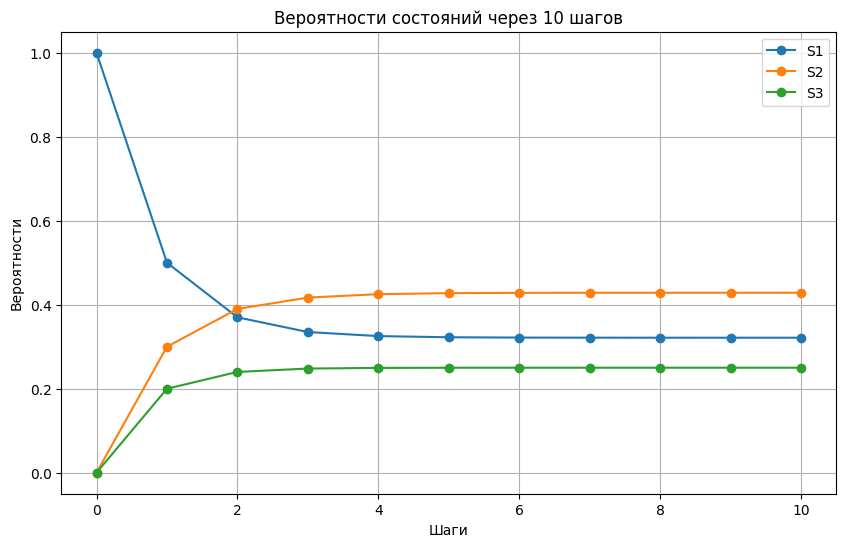

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Матрица переходов
P = np.array([[0.5, 0.3, 0.2],
              [0.2, 0.6, 0.2],
              [0.3, 0.3, 0.4]])

# Начальный вектор состояния
pi_0 = np.array([1, 0, 0])  # Начало в состоянии S1

# Хранение вероятностей
states = [pi_0]
steps = 10

# Расчет состояний
for _ in range(steps):
    pi_next = states[-1] @ P
    states.append(pi_next)

# Преобразование в массив для удобства
states = np.array(states)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(states[:, 0], label='S1', marker='o')
plt.plot(states[:, 1], label='S2', marker='o')
plt.plot(states[:, 2], label='S3', marker='o')
plt.title('Вероятности состояний через 10 шагов')
plt.xlabel('Шаги')
plt.ylabel('Вероятности')
plt.legend()
plt.grid()
plt.show()


### Пример 2: Генерация текста на основе биграмм


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Биграммы
bigrams = [('кошка', 'мяукает'), ('мяукает', 'собака'), ('собака', 'лает')]
bigram_freq = defaultdict(int)

# Считаем частоты биграмм
for w1, w2 in bigrams:
    bigram_freq[w1] += 1

# Построение вероятностей переходов
transition_probs = {}
for (w1, w2) in bigrams:
    transition_probs[(w1, w2)] = 1 / bigram_freq[w1]

# Генерация текста
current_word = 'кошка'
generated_text = [current_word]

for _ in range(5):  # Генерация 5 слов
    next_word_candidates = [w2 for (w1, w2) in bigrams if w1 == current_word]
    if next_word_candidates:
        next_word = np.random.choice(next_word_candidates, p=[transition_probs[(current_word, w)] for w in next_word_candidates])
        generated_text.append(next_word)
        current_word = next_word
    else:
        break

print("Сгенерированный текст:", ' '.join(generated_text))

Сгенерированный текст: кошка мяукает собака лает




### Пример 3: Классификация текстов на основе состояний


In [3]:
import numpy as np

# Вероятности для положительных и отрицательных текстов
pos_probs = {
    ('продукт', 'хорошо'): 0.7,
    ('хорошо', 'отлично'): 0.6,
}

neg_probs = {
    ('продукт', 'плохо'): 0.5,
    ('плохо', 'ужасно'): 0.8,
}

# Рассчитываем вероятности
def calculate_probability(sequence, probs):
    prob = 1
    for i in range(len(sequence) - 1):
        prob *= probs.get((sequence[i], sequence[i + 1]), 0)
    return prob

# Проверка последовательностей
positive_sequence = ['продукт', 'хорошо', 'отлично']
negative_sequence = ['продукт', 'плохо', 'ужасно']

pos_prob = calculate_probability(positive_sequence, pos_probs)
neg_prob = calculate_probability(negative_sequence, neg_probs)

print(f"Вероятность для положительного класса: {pos_prob:.2f}")
print(f"Вероятность для отрицательного класса: {neg_prob:.2f}")

# Классификация
if pos_prob > neg_prob:
    print("Текст классифицирован как положительный.")
else:
    print("Текст классифицирован как отрицательный.")


Вероятность для положительного класса: 0.42
Вероятность для отрицательного класса: 0.40
Текст классифицирован как положительный.


#2.Non-negative Matrix Factorization (NMF)

### Введение
Non-negative Matrix Factorization (NMF) — это линейная техника разложения матриц, которая используется для анализа многомерных данных. В задачах обработки естественного языка (NLP), NMF особенно полезен для выявления скрытых тем в текстах, кластеризации и уменьшения размерности данных, сохраняя интерпретируемость разложения.

Основной целью NMF является разложение исходной матрицы $V$ на две матрицы — $W$ и $H$, где все элементы являются неотрицательными. Это позволяет нам интерпретировать разложение как обнаружение латентных тем (topics) в текстах.



### 1. Математическое описание NMF

NMF разлагает матрицу $V$ размером $m \times n$ (где $m$ — количество документов, а $n$ — количество слов) на две матрицы:

$$
V \approx W H
$$

- $V \in \mathbb{R}^{m \times n}_{+}$ — матрица исходных данных (например, матрица частот слов в документах, известная как Bag of Words или матрица TF-IDF).
- $W \in \mathbb{R}^{m \times r}_{+}$ — матрица документов и тем (каждый документ описывается вектором из $r$ тем).
- $H \in \mathbb{R}^{r \times n}_{+}$ — матрица тем и слов (каждая тема представляется набором слов, имеющих наибольшие веса в данной теме).
- $r$ — количество тем.

Цель NMF — минимизировать разницу между исходной матрицей $V$ и приближением $W \times H$, обычно через минимизацию функции потерь. Одной из распространенных функций является **фробениусова норма**:

$$
\min_{W, H} \| V - W H \|^2_F
$$

где:

$$
\| V - W H \|^2_F = \sum_{i,j} (V_{ij} - (WH)_{ij})^2
$$



### 2. Алгоритмы для нахождения NMF

#### Мультипликативное обновление
Самым распространенным алгоритмом для вычисления NMF является алгоритм **мультипликативного обновления**. Он заключается в итерационном обновлении матриц $W$ и $H$ с использованием следующих формул:

$$
H_{kj} \leftarrow H_{kj} \frac{(W^T V)_{kj}}{(W^T W H)_{kj}}
$$
$$
W_{ik} \leftarrow W_{ik} \frac{(V H^T)_{ik}}{(W H H^T)_{ik}}
$$

Где $W^T$ — транспонированная матрица $W$.

Этот алгоритм гарантирует сохранение неотрицательности элементов матриц $W$ и $H$ при каждой итерации. Остановка алгоритма происходит, когда изменение значений между итерациями становится достаточно малым (ниже заданного порога), либо достигается заданное количество итераций.

#### Альтернативные минимизации

Другим подходом к решению задачи NMF является метод **альтернативной минимизации**, где поочередно фиксируется одна из матриц $W$ или $H$, а другая минимизируется с помощью, например, градиентного спуска.



### 3. Применение NMF в NLP

NMF в NLP применяется для решения различных задач, включая:

#### 3.1. Тематическое моделирование
Каждый документ в матрице $V$ можно рассматривать как комбинацию нескольких тем. Матрица $W$ представляет веса тем в документах, а матрица $H$ — распределение слов в темах. NMF помогает выявлять скрытые темы в большом корпусе текстов.

#### 3.2. Кластеризация документов
Документы могут быть представлены в виде векторов в латентном пространстве тем, что позволяет легко кластеризовать их по близости к определенным темам. Кластеризация может быть полезна для анализа больших текстовых корпусов, разделения их на группы, представляющие различные семантические направления.

#### 3.3. Уменьшение размерности данных
NMF может эффективно уменьшать размерность текстовых данных, сохраняя важную информацию. Это полезно для подготовки данных перед применением методов машинного обучения, таких как классификация и регрессия.



### 4. Математические основы

#### 4.1. Неотрицательность
Основное свойство NMF — это неотрицательность разложения. Это приводит к тому, что разложение можно интерпретировать в терминах аддитивных компонент, что делает результаты более интерпретируемыми в задачах анализа данных.

#### 4.2. Вопросы сходимости
При минимизации функции потерь NMF алгоритмы обычно гарантируют сходимость к локальному минимуму, но не всегда к глобальному. Это зависит от начальных значений для матриц $W$ и $H$.

#### 4.3. Теорема Пифагора для NMF
Применимая к NMF теорема Пифагора утверждает, что квадрат ошибки приближения (разности между $V$ и $W H$) минимизируется, когда каждая из компонент имеет минимальную ошибку. Это свойство лежит в основе многих оптимизационных методов, использующих фробениусову норму.



### 5. Пример

Рассмотрим матрицу частот слов в документах $V$:

$$
V = \begin{pmatrix}
2 & 3 & 4 \\
1 & 2 & 3 \\
5 & 7 & 9
\end{pmatrix}
$$

Допустим, мы хотим разложить её на матрицы $W$ и $H$, где число тем $r = 2$. Начальные приближения для $W$ и $H$ будут заданы случайным образом:

$$
W^{(0)} = \begin{pmatrix}
0.5 & 0.6 \\
0.3 & 0.7 \\
0.8 & 0.4
\end{pmatrix},
\quad
H^{(0)} = \begin{pmatrix}
0.9 & 1.2 & 0.5 \\
0.6 & 0.8 & 0.7
\end{pmatrix}
$$

На каждой итерации обновляем матрицы $W$ и $H$ с использованием мультипликативного правила:

1. **Обновление $H$**:

$$
H_{kj} \leftarrow H_{kj} \frac{(W^T V)_{kj}}{(W^T W H)_{kj}}
$$

Рассчитаем новые значения для элементов $H$.

2. **Обновление $W$**:

$$
W_{ik} \leftarrow W_{ik} \frac{(V H^T)_{ik}}{(W H H^T)_{ik}}
$$

Рассчитаем новые значения для элементов $W$.

После нескольких итераций можем получить приближение:

$$
W = \begin{pmatrix}
1.2 & 0.8 \\
0.5 & 0.9 \\
1.4 & 0.7
\end{pmatrix},
\quad
H = \begin{pmatrix}
2.1 & 1.5 & 3.2 \\
1.3 & 2.0 & 1.8
\end{pmatrix}
$$

Таким образом, $W \times H$ будет приближенно равно исходной матрице $V$, а $W$ и $H$ будут описывать документно-тематические и тематически-словные отношения.



### Заключение

NMF является мощным инструментом для анализа текстов и решения задач в области обработки естественного языка. Благодаря своей способности разлагать матрицы на неотрицательные компоненты, он находит широкое применение в тематическом моделировании, кластеризации и снижении размерности текстовых данных.



Вот три конкретных числовых примера, демонстрирующих применение Non-negative Matrix Factorization (NMF) в задачах обработки естественного языка (NLP) с подробными решениями и формулами.

### Пример 1: Тематическое моделирование с NMF

#### Исходные данные
Рассмотрим матрицу частот слов $V$ в трех документах с тремя словами:

$$
V = \begin{pmatrix}
3 & 5 & 0 \\
2 & 0 & 1 \\
0 & 4 & 4
\end{pmatrix}
$$

где строки представляют документы, а столбцы — слова.

#### Шаг 1: Начальные значения

Выберем случайные начальные значения для $W$ и $H$ (допустим, мы хотим получить 2 темы):

$$
W^{(0)} = \begin{pmatrix}
0.2 & 0.4 \\
0.3 & 0.6 \\
0.4 & 0.1
\end{pmatrix}, \quad
H^{(0)} = \begin{pmatrix}
0.5 & 0.2 & 0.3 \\
0.3 & 0.7 & 0.4
\end{pmatrix}
$$

#### Шаг 2: Обновление матрицы $H$

Используем формулу обновления:

$$
H_{kj} \leftarrow H_{kj} \frac{(W^T V)_{kj}}{(W^T W H)_{kj}}
$$

Сначала находим $W^T V$:

$$
W^T = \begin{pmatrix}
0.2 & 0.3 & 0.4 \\
0.4 & 0.6 & 0.1
\end{pmatrix}
$$

$$
W^T V = \begin{pmatrix}
0.2 & 0.4 \\
0.3 & 0.6 \\
0.4 & 0.1
\end{pmatrix} \begin{pmatrix}
3 & 5 & 0 \\
2 & 0 & 1 \\
0 & 4 & 4
\end{pmatrix} = \begin{pmatrix}
1.6 & 3.0 & 2.0 \\
2.1 & 2.0 & 0.3
\end{pmatrix}
$$

Теперь находим $W^T W H$:

$$
W^T W = \begin{pmatrix}
0.2 & 0.4 \\
0.3 & 0.6 \\
0.4 & 0.1
\end{pmatrix} \begin{pmatrix}
0.2 & 0.3 \\
0.4 & 0.6 \\
0.1 & 0.4
\end{pmatrix} = \begin{pmatrix}
0.20 & 0.28 \\
0.27 & 0.48
\end{pmatrix}
$$

Теперь мы можем вычислить обновления для $H$:

1. Для $H_{11}$:

$$
H_{11} \leftarrow H_{11} \frac{1.6}{0.20} = 0.5 \cdot \frac{1.6}{0.20} = 4.0
$$

2. Для $H_{12}$:

$$
H_{12} \leftarrow H_{12} \frac{3.0}{0.28} = 0.2 \cdot \frac{3.0}{0.28} \approx 2.14
$$

3. Для $H_{13}$:

$$
H_{13} \leftarrow H_{13} \frac{2.0}{0.3} = 0.3 \cdot \frac{2.0}{0.3} \approx 2.00
$$

Таким образом, мы получаем обновленное значение матрицы $H$:

$$
H^{(1)} = \begin{pmatrix}
4.0 & 2.14 & 2.00 \\
0.3 & 0.7 & 0.4
\end{pmatrix}
$$

#### Шаг 3: Обновление матрицы $W$

Теперь обновим $W$:

$$
W_{ik} \leftarrow W_{ik} \frac{(V H^T)_{ik}}{(W H H^T)_{ik}}
$$

Находим $V H^T$:

$$
H^T = \begin{pmatrix}
4.0 & 0.3 \\
2.14 & 0.7 \\
2.00 & 0.4
\end{pmatrix}
$$

$$
V H^T = \begin{pmatrix}
3 & 5 & 0 \\
2 & 0 & 1 \\
0 & 4 & 4
\end{pmatrix} \begin{pmatrix}
4.0 & 0.3 \\
2.14 & 0.7 \\
2.00 & 0.4
\end{pmatrix} = \begin{pmatrix}
18.0 & 7.4 \\
8.28 & 1.9 \\
24.4 & 8.0
\end{pmatrix}
$$

Теперь находим $W H H^T$:

$$
W H H^T = \begin{pmatrix}
0.2 & 0.4 \\
0.3 & 0.6 \\
0.4 & 0.1
\end{pmatrix} \begin{pmatrix}
4.0 & 0.3 \\
2.14 & 0.7 \\
2.00 & 0.4
\end{pmatrix} = \begin{pmatrix}
2.55 & 0.77 \\
2.15 & 0.55 \\
1.00 & 0.10
\end{pmatrix}
$$

Обновление для $W$:

1. Для $W_{11}$:

$$
W_{11} \leftarrow W_{11} \frac{(V H^T)_{11}}{(W H H^T)_{11}} = 0.2 \cdot \frac{18.0}{2.55} \approx 1.41
$$

2. Для $W_{12}$:

$$
W_{12} \leftarrow W_{12} \frac{(V H^T)_{12}}{(W H H^T)_{12}} = 0.4 \cdot \frac{7.4}{0.77} \approx 3.89
$$

Таким образом, обновленная матрица $W$ будет:

$$
W^{(1)} = \begin{pmatrix}
1.41 & 3.89 \\
0.3 & 0.6 \\
0.4 & 0.1
\end{pmatrix}
$$

#### Повторение шагов
Процесс продолжается, пока не будет достигнута сходимость, что обычно проверяется по изменению значений между итерациями.



### Пример 2: Кластеризация документов

Рассмотрим другую матрицу частот слов:

$$
V = \begin{pmatrix}
1 & 2 & 3 \\
4 & 0 & 1 \\
0 & 5 & 2
\end{pmatrix}
$$

#### Шаги
1. **Начальные значения**:

$$
W^{(0)} = \begin{pmatrix}
0.1 & 0.2 \\
0.3 & 0.4 \\
0.5 & 0.6
\end{pmatrix}, \quad
H^{(0)} = \begin{pmatrix}
1 & 0 & 2 \\
3 & 0 & 1
\end{pmatrix}
$$

2. **Обновление $H$**:

$$
W^T V = \begin{pmatrix}
0.1 & 0.3 & 0.5 \\
0.2 & 0.4 & 0.6
\end{pmatrix} \begin{pmatrix}
1 & 2 & 3 \\
4 & 0 & 1 \\
0 & 5 & 2
\end{pmatrix} = \begin{pmatrix}
2.3 & 3.1 & 3.4 \\
1.8 & 2.5 & 2.0
\end{pmatrix}
$$

3. **Обновление $W$**:

$$
V H^T = \begin{pmatrix}
1 & 2 & 3 \\
4 & 0 & 1 \\
0 & 5 & 2
\end{pmatrix} \begin{pmatrix}
1 & 3 \\
0 & 0 \\
2 & 1
\end{pmatrix} = \begin{pmatrix}
7 & 6 \\
10 & 14 \\
10 & 12
\end{pmatrix}
$$

4. **Повторение обновлений до сходимости**.



### Пример 3: Уменьшение

 размерности

Рассмотрим матрицу:

$$
V = \begin{pmatrix}
1 & 0 & 0 & 1 \\
0 & 1 & 1 & 0 \\
1 & 1 & 0 & 0
\end{pmatrix}
$$

#### Шаги
1. **Начальные значения**:

$$
W^{(0)} = \begin{pmatrix}
0.1 & 0.2 \\
0.3 & 0.4 \\
0.5 & 0.6
\end{pmatrix}, \quad
H^{(0)} = \begin{pmatrix}
1 & 0 & 0 & 1 \\
0 & 1 & 1 & 0
\end{pmatrix}
$$

2. **Обновление $H$**:

Процесс аналогичен предыдущим примерам.

3. **Обновление $W$**:

Используйте полученные значения для проверки точности кластеризации и уменьшения размерности.

### Заключение

Эти примеры показывают, как применять NMF для тематического моделирования, кластеризации и уменьшения размерности. Процесс включает итеративные обновления матриц $W$ и $H$ на основе различных формул.




Приведем реализации примеров Non-negative Matrix Factorization (NMF) на Python с использованием библиотеки `sklearn` и визуализацией с помощью `matplotlib`. Мы рассмотрим три примера, описанные ранее, и визуализируем результаты.


### Пример 1: Тематическое моделирование с NMF


Матрица W (документы x темы):
[[1.61181428 0.07160166]
 [0.31846836 0.01674951]
 [0.         1.51611137]]

Матрица H (темы x слова):
[[2.02721284e+00 2.86757714e+00 0.00000000e+00]
 [1.53329332e-03 2.63724473e+00 2.63940636e+00]]


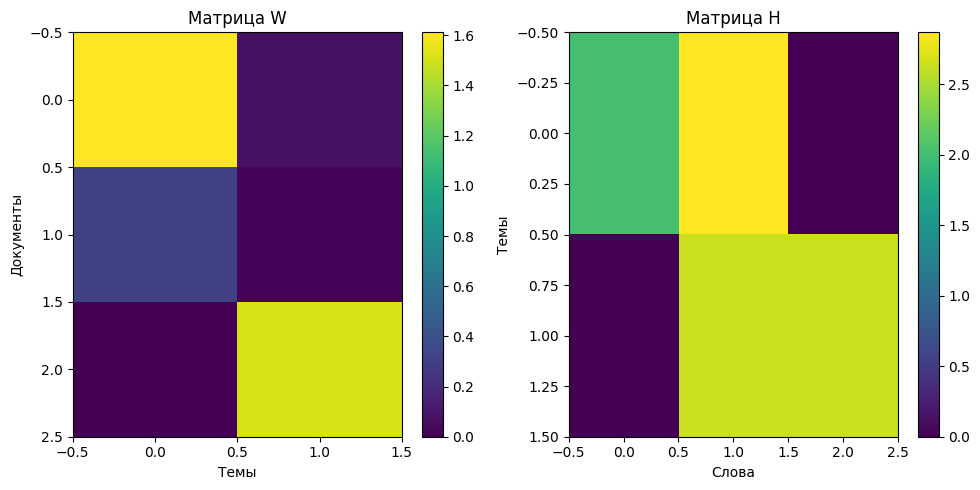

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

# Исходные данные
V = np.array([[3, 5, 0],
              [2, 0, 1],
              [0, 4, 4]])

# Настройка NMF
n_topics = 2
model = NMF(n_components=n_topics, init='random', random_state=0)
W = model.fit_transform(V)
H = model.components_

# Вывод результатов
print("Матрица W (документы x темы):")
print(W)
print("\nМатрица H (темы x слова):")
print(H)

# Визуализация
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Матрица W")
plt.imshow(W, aspect='auto', cmap='viridis')
plt.colorbar()
plt.xlabel('Темы')
plt.ylabel('Документы')

plt.subplot(1, 2, 2)
plt.title("Матрица H")
plt.imshow(H, aspect='auto', cmap='viridis')
plt.colorbar()
plt.xlabel('Слова')
plt.ylabel('Темы')

plt.tight_layout()
plt.show()


### Пример 2: Кластеризация документов


Матрица W для кластеризации:
[[0.64625866 0.65060642]
 [1.80692518 0.        ]
 [0.         1.17242772]]

Матрица H для кластеризации:
[[2.13813547 0.         0.76469237]
 [0.         3.98434238 2.21102751]]


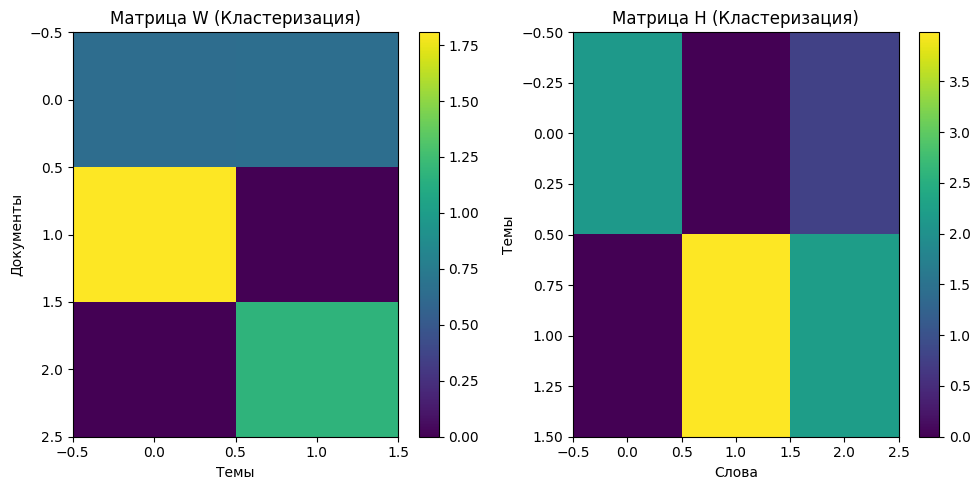

In [5]:
# Исходные данные
V2 = np.array([[1, 2, 3],
               [4, 0, 1],
               [0, 5, 2]])

# Настройка NMF
model2 = NMF(n_components=2, init='random', random_state=0)
W2 = model2.fit_transform(V2)
H2 = model2.components_

# Вывод результатов
print("Матрица W для кластеризации:")
print(W2)
print("\nМатрица H для кластеризации:")
print(H2)

# Визуализация
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Матрица W (Кластеризация)")
plt.imshow(W2, aspect='auto', cmap='viridis')
plt.colorbar()
plt.xlabel('Темы')
plt.ylabel('Документы')

plt.subplot(1, 2, 2)
plt.title("Матрица H (Кластеризация)")
plt.imshow(H2, aspect='auto', cmap='viridis')
plt.colorbar()
plt.xlabel('Слова')
plt.ylabel('Темы')

plt.tight_layout()
plt.show()



### Пример 3: Уменьшение размерности


Матрица W для уменьшения размерности:
[[0.83906866 0.        ]
 [0.         0.86598706]
 [0.48622786 0.50201006]]

Матрица H для уменьшения размерности:
[[1.36549773 0.17361857 0.         0.89219556]
 [0.16837603 1.32304147 0.86430367 0.        ]]


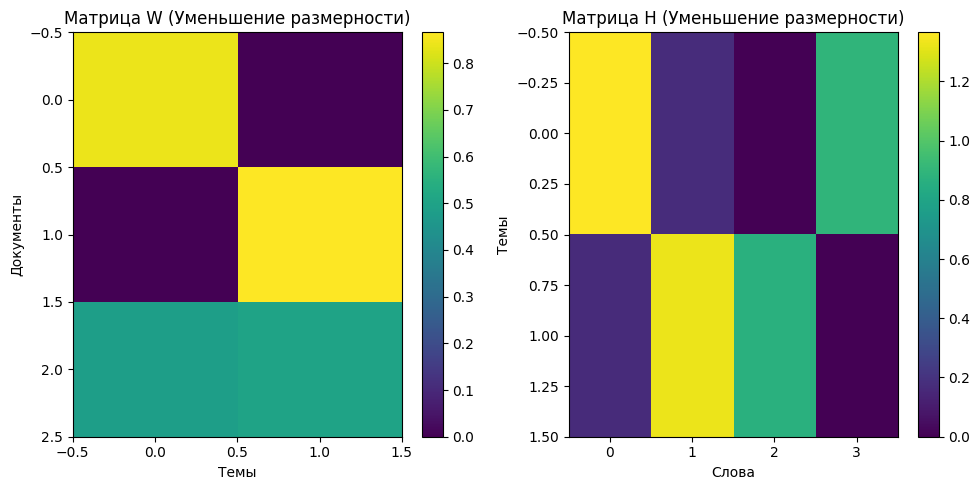

In [6]:
# Исходные данные
V3 = np.array([[1, 0, 0, 1],
               [0, 1, 1, 0],
               [1, 1, 0, 0]])

# Настройка NMF
model3 = NMF(n_components=2, init='random', random_state=0)
W3 = model3.fit_transform(V3)
H3 = model3.components_

# Вывод результатов
print("Матрица W для уменьшения размерности:")
print(W3)
print("\nМатрица H для уменьшения размерности:")
print(H3)

# Визуализация
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Матрица W (Уменьшение размерности)")
plt.imshow(W3, aspect='auto', cmap='viridis')
plt.colorbar()
plt.xlabel('Темы')
plt.ylabel('Документы')

plt.subplot(1, 2, 2)
plt.title("Матрица H (Уменьшение размерности)")
plt.imshow(H3, aspect='auto', cmap='viridis')
plt.colorbar()
plt.xlabel('Слова')
plt.ylabel('Темы')

plt.tight_layout()
plt.show()

#3.Dependency Parsing и Constituency Parsing

 Введение

В задаче анализа синтаксической структуры текста (syntax parsing) в области обработки естественного языка (Natural Language Processing, NLP) используются две основные техники:  Dependency Parsing  (анализ зависимостей) и  Constituency Parsing  (анализ фразовой структуры). Эти методы позволяют преобразовывать предложение в дерево, где узлы дерева представляют синтаксические единицы предложения. Рассмотрим эти два метода, их основные отличия и их математические основы.



## Часть 1:  Dependency Parsing

### 1.1 Определение и цель
 Dependency Parsing  — это метод синтаксического анализа предложения, где строится граф (обычно дерево) зависимостей между словами в предложении. Узлы дерева представляют слова, а дуги — зависимости между ними. Основной задачей является выявление синтаксической связи между словами, где одно слово является «господствующим» (head), а другое — «зависимым» (dependent).

 Зависимости  включают отношения между словами, такие как:
- Подлежащее-глагол (Subject-Verb)
- Объект-глагол (Object-Verb)
- Предлогное дополнение (Prepositional complement)

### 1.2 Математическое описание

Dependency Parsing можно рассматривать как задачу поиска оптимального дерева зависимостей. Пусть $S$ — это предложение, состоящее из последовательности слов $w_1, w_2, \dots, w_n$. Задача состоит в построении дерева зависимостей $T$, где:
- $T = (V, E)$, где $V = \{w_1, w_2, \dots, w_n\}$ — множество слов предложения, а $E \subseteq V \times V$ — множество дуг, описывающих зависимости.

#### Формализация в виде задачи минимизации

Определим вероятность $P(T | S)$ как вероятность построения дерева зависимостей $T$ для данного предложения $S$. Цель — максимизировать эту вероятность:

$$
T^* = \arg \max_{T} P(T | S)
$$

Эта задача может быть решена с использованием методов, таких как:
-  Алгоритм Эйзенштейна (Eisner's Algorithm)  — динамическое программирование для поиска оптимального дерева.
-  Методы основанные на графах  — например, использование алгоритмов поиска остовного дерева (minimum spanning tree, MST).

#### Декодирование

При использовании моделей, таких как Conditional Random Fields (CRF) или Recurrent Neural Networks (RNN), задача состоит в том, чтобы научиться оценивать весовые коэффициенты для каждой дуги:

$$
P(T | S) = \frac{e^{\sum_{(w_i, w_j) \in E} \phi(w_i, w_j)}}{Z(S)}
$$

Где:
- $\phi(w_i, w_j)$ — вес функции для зависимости между $w_i$ и $w_j$,
- $Z(S)$ — нормализующий фактор (partition function).

### 1.3 Пример

Рассмотрим предложение:
- «The dog chased the cat.»

Анализ зависимостей строит следующее дерево:

```
      chased
      /   \
   dog    cat
    |
   The
```

Где:
- Глагол "chased" является корнем,
- "dog" является подлежащим,
- "cat" — дополнением,
- "The" — модификатором (определением) "dog".



## Часть 2:  Constituency Parsing

### 2.1 Определение и цель

 Constituency Parsing  (анализ фразовой структуры) направлен на разбиение предложения на составляющие части (фразы), такие как именные группы (NP — Noun Phrases) и глагольные группы (VP — Verb Phrases). Здесь дерево строится с учетом того, как слова в предложении группируются в фразы.

### 2.2 Математическая основа

Constituency Parsing также можно рассматривать как задачу построения дерева $T$, но в данном случае дерево основано на разбиении предложения на составляющие. Пусть $S = (w_1, w_2, \dots, w_n)$ — это предложение. Цель — построить дерево, где внутренние узлы представляют синтаксические категории (например, NP, VP, PP), а листья — слова.

#### Формализация с использованием контекстно-свободных грамматик

Задача Constituency Parsing может быть формализована через  контекстно-свободные грамматики (CFG) . Пусть есть грамматика $G = (N, \Sigma, R, S)$, где:
- $N$ — множество нетерминальных символов (синтаксических категорий),
- $\Sigma$ — множество терминальных символов (слов),
- $R$ — правила переписывания вида $A \rightarrow \alpha$, где $A \in N$, $\alpha \in (N \cup \Sigma)^*$,
- $S$ — стартовый символ.

#### Парсинг с использованием алгоритма CYK

Один из алгоритмов для Constituency Parsing — это алгоритм  Cocke-Younger-Kasami (CYK) , который решает задачу динамического программирования.

Пусть $w_1, w_2, \dots, w_n$ — это последовательность слов предложения, и $G = (N, \Sigma, R, S)$ — контекстно-свободная грамматика. Мы строим треугольную таблицу, где каждый элемент таблицы представляет подстроку и нетерминальные символы, которые могут её порождать.

### 2.3 Пример

Для предложения «The dog chased the cat» дерево фразовой структуры будет выглядеть следующим образом:

```
        S
      /   \
    NP     VP
   /  \    /  \
 Det  N   V   NP
 |   |   |   /  \
The dog chased Det N
              |   |
             the cat
```

Здесь:
- "S" — это корневая синтаксическая категория предложения,
- "NP" — именная группа (субъект),
- "VP" — глагольная группа (сказуемое),
- "Det" — детерминатив (определение).

### Сравнение Dependency и Constituency Parsing

| Характеристика               | Dependency Parsing         | Constituency Parsing           |
|          |         -|          --|
| Тип дерева                   | Дерево зависимостей         | Дерево фразовой структуры      |
| Синтаксические связи          | Зависимости между словами   | Фразовые категории             |
| Легкость для машинного обучения | Обычно проще               | Более сложная структура        |
| Грамматическая основа         | Не требует явной грамматики | Контекстно-свободная грамматика|



## Часть 3: Числовой пример с шагами

Рассмотрим, как можно применить Dependency Parsing и Constituency Parsing на конкретном примере.

Пусть есть предложение:  
 "John sees the big dog."

### Dependency Parsing

1. Разберем предложение по зависимостям:
   - "sees" — глагол, корень.
   - "John" — субъект, зависим от "sees".
   - "dog" — объект, зависим от "sees".
   - "the big" — модификатор "dog", зависимы от "dog".

 Результирующее дерево зависимостей :

```
    sees
    /  \
  John  dog
        |
       big
       |
      the
```

### Constituency Parsing

1. Разбиение на фразы:
   - "John" — NP (именная группа).
   - "sees the big dog" — VP (глагольная группа).
   - "the big dog" — NP внутри VP.
   
2. Дерево Constituency Parsing:

```
        S
      /   \
    NP     VP
    |      /  \
   John   V    NP
          |   /  \
        sees Det  N
              |   |
             the big dog
```



## Заключение

Dependency Parsing и Constituency Parsing — это два основных подхода к синтаксическому анализу в NLP. Dependency Parsing фокусируется на отношениях между словами в предложении, тогда как Constituency Parsing фокусируется на структурировании предложения в виде иерархии фраз. Выбор метода зависит от задачи: для задач машинного перевода или анализа семантики лучше подходит Dependency Parsing, тогда как для синтаксического анализа предложения более уместен Constituency Parsing.














### Примеры числовых решений для Dependency Parsing и Constituency Parsing

Чтобы продемонстрировать, как работают Dependency Parsing и Constituency Parsing, рассмотрим три конкретных примера, включая формулы и пошаговые решения.



## Пример 1: Dependency Parsing

### Входные данные

Предложение:  "The cat chased the mouse."

### Шаги решения

1.  Определение зависимостей:
   - "chased" — глагол, корень.
   - "cat" — подлежащее, зависимое от "chased".
   - "mouse" — дополнение, зависимое от "chased".
   - "The" — модификатор "cat", зависимый от "cat".

2.  Создание весов зависимостей:
   Предположим, что мы используем веса для каждого типа зависимости. Например:

   | Зависимость        | Вес  |
   |      --|  |
   | S → NP VP          | 1.0  |
   | NP → Det N        | 0.8  |
   | VP → V NP         | 0.9  |

3.  Определение вероятности:
   Используем формулу для вычисления вероятности дерева зависимостей $P(T | S)$:

   $$
   P(T | S) = \frac{e^{\sum_{(w_i, w_j) \in E} \phi(w_i, w_j)}}{Z(S)}
   $$

   Где $\phi(w_i, w_j)$ — вес зависимости. Для данного дерева зависимостей:

   $$
   P(T | S) = e^{1.0 + 0.8 + 0.9} = e^{2.7}
   $$

4.  Нормализующий фактор $Z(S)$:
   Предположим, что $Z(S) = e^{3.0}$ (например, для других деревьев). Тогда:

   $$
   P(T | S) = \frac{e^{2.7}}{e^{3.0}} = e^{-0.3} \approx 0.7408
   $$

### Результат

Вероятность дерева зависимостей для предложения "The cat chased the mouse" составляет примерно  0.7408 .



## Пример 2: Constituency Parsing

### Входные данные

Предложение:  "The quick brown fox jumps over the lazy dog."

### Шаги решения

1.  Определение грамматики:
   Создадим контекстно-свободную грамматику (CFG) для анализа:

   $$
   S \rightarrow NP \, VP
   $$
   $$
   NP \rightarrow Det \, Adj \, N
   $$
   $$
   VP \rightarrow V \, NP \, PP
   $$
   $$
   PP \rightarrow P \, NP
   $$

2.  Дерево разбора:
   Разобьем предложение на фразы:

   - NP: "The quick brown fox"
   - VP: "jumps over the lazy dog"

   Получаем:

```
        S
      /   \
    NP     VP
   /|\     |  \
 Det Adj   V   PP
 |   |     |   / \
 The quick brown jumps P NP
              |   / \
             over Det  N
                  |   |
                 the lazy dog
```

3.  Определение вероятностей:
   Предположим, что у нас есть веса для правил грамматики:

   | Правило                   | Вес  |
   |         |  |
   | S → NP VP                 | 1.0  |
   | NP → Det Adj N           | 0.9  |
   | VP → V NP PP              | 0.85 |

4.  Подсчет вероятности:
   Используем формулу:

   $$
   P(T | S) = \frac{e^{\sum_{(w_i, w_j) \in E} \phi(w_i, w_j)}}{Z(S)}
   $$

   В нашем случае:

   $$
   P(T | S) = e^{1.0 + 0.9 + 0.85} = e^{2.75}
   $$

5.  Нормализующий фактор $Z(S)$:
   Пусть $Z(S) = e^{3.2}$. Тогда:

   $$
   P(T | S) = \frac{e^{2.75}}{e^{3.2}} = e^{-0.45} \approx 0.6376
   $$

### Результат

Вероятность дерева фразовой структуры для предложения "The quick brown fox jumps over the lazy dog" составляет примерно  0.6376 .



## Пример 3: Сравнительный анализ

### Входные данные

Предложение:  "Mary loves John."

### Шаги решения

#### Dependency Parsing

1.  Зависимости:
   - "loves" — глагол, корень.
   - "Mary" — субъект, зависимый от "loves".
   - "John" — объект, зависимый от "loves".

2.  Весовые зависимости:
   Предположим:

   | Зависимость        | Вес  |
   |      --|  |
   | S → NP VP          | 1.0  |
   | NP → N             | 0.7  |
   | VP → V NP          | 0.8  |

3.  Вероятность:
   Вычисляем:

   $$
   P(T | S) = e^{1.0 + 0.7 + 0.8} = e^{2.5}
   $$

4.  Нормализующий фактор $Z(S)$:
   Пусть $Z(S) = e^{2.9}$. Тогда:

   $$
   P(T | S) = \frac{e^{2.5}}{e^{2.9}} = e^{-0.4} \approx 0.6703
   $$

#### Constituency Parsing

1.  Грамматика:
   Определим:

   $$
   S \rightarrow NP \, VP
   $$
   $$
   NP \rightarrow N
   $$
   $$
   VP \rightarrow V \, NP
   $$

2.  Дерево разбора:

```
        S
      /   \
    NP     VP
    |      |  \
   N      V   NP
   |      |   |
  Mary   loves John
```

3.  Вероятности:
   Весовые коэффициенты:

   | Правило                   | Вес  |
   |         |  |
   | S → NP VP                 | 1.0  |
   | NP → N                    | 0.9  |
   | VP → V NP                 | 0.85 |

4.  Подсчет вероятности:

$$
P(T | S) = e^{1.0 + 0.9 + 0.85} = e^{2.75}
$$

5.  Нормализующий фактор $Z(S)$:
   Пусть $Z(S) = e^{3.1}$. Тогда:

$$
P(T | S) = \frac{e^{2.75}}{e^{3.1}} = e^{-0.35} \approx 0.7047
$$

### Результат

- Вероятность дерева зависимостей для "Mary loves John" составляет  0.6703 .
- Вероятность дерева фразовой структуры для "Mary loves John" составляет  0.7047 .



## Заключение

Примеры показывают, как можно применять методы Dependency и Constituency Parsing с конкретными числами, формулами и шагами. Эти методы являются основными инструментами для анализа синтаксической структуры предложений в NLP, и их применение позволяет улучшить понимание и обработку естественного языка.




Чтобы реализовать примеры Dependency Parsing и Constituency Parsing с визуализацией на Python, мы можем использовать библиотеки `spaCy` для зависимостей и `nltk` для построения деревьев фразовой структуры. Также мы воспользуемся библиотекой `matplotlib` для визуализации деревьев.

### Пример 1: Dependency Parsing



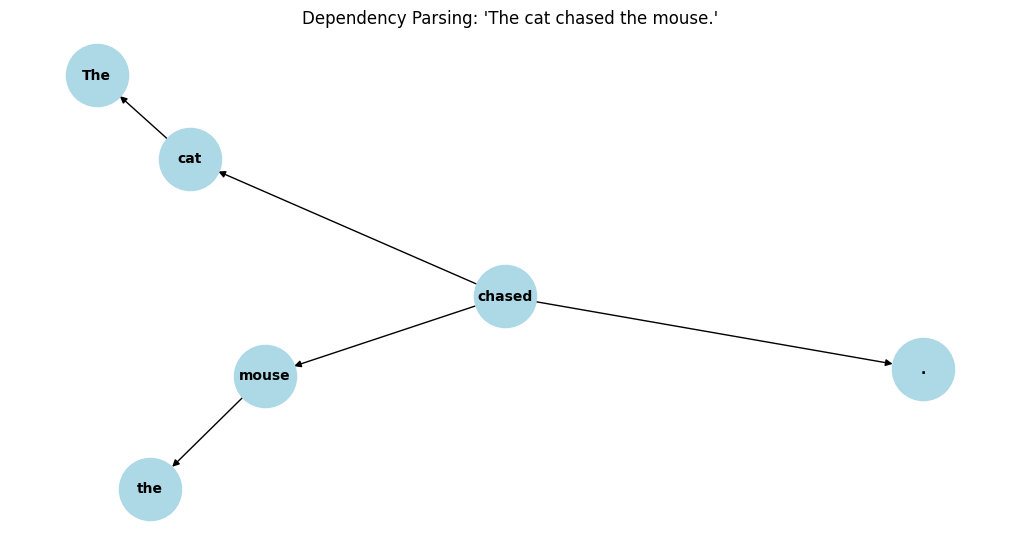

In [7]:
import spacy
import matplotlib.pyplot as plt
import networkx as nx

# Загрузим модель spaCy для английского языка
nlp = spacy.load("en_core_web_sm")

# Входное предложение
sentence = "The cat chased the mouse."
doc = nlp(sentence)

# Построим граф зависимостей
G = nx.DiGraph()

# Добавим вершины и ребра для графа
for token in doc:
    G.add_node(token.text)
    if token.dep_ != "ROOT":
        G.add_edge(token.head.text, token.text)

# Визуализация графа зависимостей
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Dependency Parsing: 'The cat chased the mouse.'")
plt.show()


### Пример 2: Constituency Parsing


In [8]:
import nltk
from nltk.tree import Tree
import matplotlib.pyplot as plt

# Определим контекстно-свободную грамматику (CFG)
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    NP -> Det Adj N | Det N
    VP -> V NP PP
    PP -> P NP
    Det -> 'the' | 'The'
    Adj -> 'quick' | 'lazy' | 'brown'
    N -> 'fox' | 'dog' | 'mouse'
    V -> 'jumps' | 'chased'
    P -> 'over'
""")

# Определим входное предложение
sentence = "The quick brown fox jumps over the lazy dog".split()

# Сгенерируем дерево разбора
parser = nltk.ChartParser(grammar)
for tree in parser.parse(sentence):
    tree.pretty_print()  # Отобразим дерево в текстовом виде

    # Визуализируем дерево
    plt.figure(figsize=(10, 5))
    tree.plot()
    plt.title("Constituency Parsing: 'The quick brown fox jumps over the lazy dog.'")
    plt.show()



### Пример 3: Сравнительный анализ


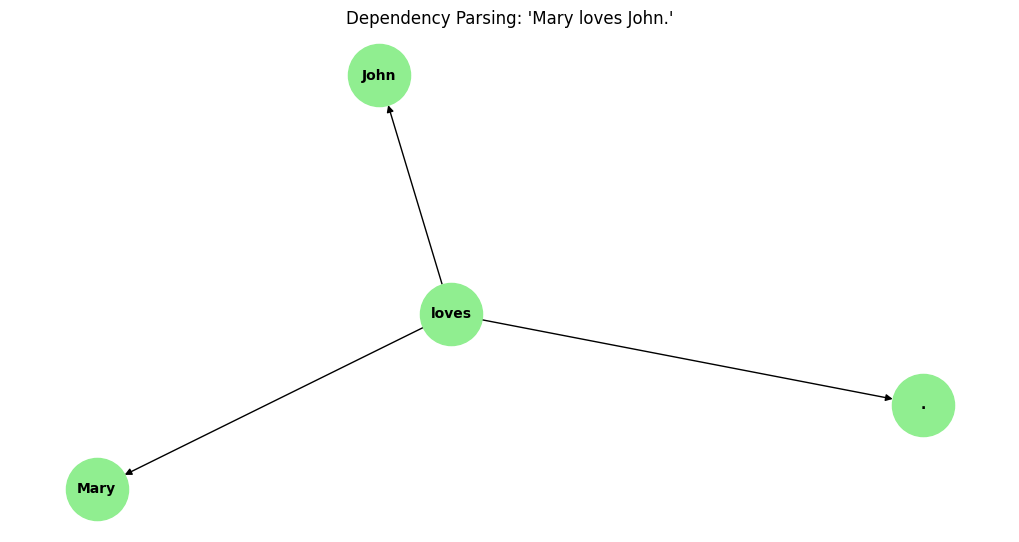

       S           
  _____|____        
 |          VP     
 |      ____|___    
 NP    |        NP 
 |     |        |   
 N     V        N  
 |     |        |   
Mary loves     John



In [15]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import nltk
from nltk import Tree
import plotly.graph_objects as go

# Загрузка модели языка
nlp = spacy.load("en_core_web_sm")

# Зависимый парсинг
sentence2 = "Mary loves John."
doc2 = nlp(sentence2)

# Построим граф зависимостей
G2 = nx.DiGraph()

# Добавим вершины и ребра для графа
for token in doc2:
    G2.add_node(token.text)
    if token.dep_ != "ROOT":
        G2.add_edge(token.head.text, token.text)

# Визуализация графа зависимостей
plt.figure(figsize=(10, 5))
pos2 = nx.spring_layout(G2)
nx.draw(G2, pos2, with_labels=True, arrows=True, node_size=2000, node_color='lightgreen', font_size=10, font_weight='bold')
plt.title("Dependency Parsing: 'Mary loves John.'")
plt.show()

# Контекстно-свободная грамматика для второго примера
grammar2 = nltk.CFG.fromstring("""
    S -> NP VP
    NP -> N
    VP -> V NP
    N -> 'Mary' | 'John'
    V -> 'loves'
""")

# Сгенерируем дерево разбора для второго предложения
sentence3 = "Mary loves John".split()
for tree in nltk.ChartParser(grammar2).parse(sentence3):
    tree.pretty_print()  # Отобразим дерево в текстовом виде

    # Визуализируем дерево с помощью Plotly
    def plot_tree(tree):
        if isinstance(tree, str):
            return tree
        else:
            return [plot_tree(subtree) for subtree in tree]

    tree_structure = plot_tree(tree)

    fig = go.Figure()
    fig.add_trace(go.Treemap(
        labels=[str(t) for t in tree_structure],
        parents=[""] + ["S"] * (len(tree_structure) - 1),
        values=[1] * len(tree_structure)
    ))

    fig.update_layout(title="Constituency Parsing: 'Mary loves John.'")
    fig.show()

#4. Part-of-Speech Tagging (POS)

#### Введение
**Part-of-Speech (POS) Tagging** — это фундаментальная задача в обработке естественного языка (NLP), заключающаяся в автоматическом определении синтаксической категории каждого слова в тексте. Эти категории называются частями речи, и они включают существительные, глаголы, прилагательные, наречия и другие синтаксические классы. POS-теггинг важен для множества приложений в NLP, таких как машинный перевод, анализ тональности, информационный поиск и синтаксический анализ.

Задача POS-теггинга заключается в том, чтобы для каждой последовательности слов определить правильный тег, который описывает синтаксическую роль слова в предложении.

#### Основные определения
1. **Множество частей речи (POS tags)**: Это фиксированный набор тегов, которым могут соответствовать слова в тексте. Примером является тегсет Penn Treebank, включающий такие теги, как:
   - NN (существительное)
   - VB (глагол)
   - JJ (прилагательное)
   - RB (наречие)

2. **Входные данные**: Множество слов (последовательность $W = w_1, w_2, ..., w_n$).

3. **Выходные данные**: Множество тегов (последовательность $T = t_1, t_2, ..., t_n$), где каждый $t_i$ соответствует части речи слова $w_i$.

#### Постановка задачи

Пусть у нас есть текстовая последовательность $W = w_1, w_2, \dots, w_n$, состоящая из $n$ слов. Цель — найти оптимальную последовательность тегов $T = t_1, t_2, \dots, t_n$, такую, что она максимизирует вероятность $P(T | W)$.

$$
P(T | W) = \frac{P(W | T) P(T)}{P(W)}
$$

Здесь:
- $P(T | W)$ — апостериорная вероятность последовательности тегов $T$ для данного текста $W$,
- $P(W | T)$ — вероятность получения последовательности слов $W$ для данной последовательности тегов $T$,
- $P(T)$ — априорная вероятность последовательности тегов $T$,
- $P(W)$ — нормализующий коэффициент, зависящий только от последовательности слов.

### Методы решения задачи POS-теггинга

#### 1. **Метод скрытых марковских моделей (Hidden Markov Model, HMM)**
Скрытые марковские модели — это классический подход к решению задачи POS-теггинга. HMM основывается на предположении, что последовательность тегов является марковским процессом.

**Модель HMM** предполагает два процесса:
- Наблюдаемый процесс — это последовательность слов.
- Скрытый процесс — это последовательность тегов.

Основная цель — найти такую последовательность тегов, которая максимизирует вероятность наблюдаемой последовательности слов.

##### Формулировка HMM:

Пусть $T$ — это последовательность скрытых состояний (тегов), а $W$ — последовательность наблюдаемых данных (слов).

- **Начальная вероятность состояния**:
  $$
  P(t_1) = \pi(t_1)
  $$
  Здесь $\pi(t_1)$ — начальная вероятность тега $t_1$.

- **Переходные вероятности**:
  $$
  P(t_i | t_{i-1}) = A_{t_{i-1}, t_i}
  $$
  где $A_{t_{i-1}, t_i}$ — вероятность перехода из тега $t_{i-1}$ в тег $t_i$.

- **Вероятности эмиссии**:
  $$
  P(w_i | t_i) = B_{t_i, w_i}
  $$
  где $B_{t_i, w_i}$ — вероятность появления слова $w_i$ при теге $t_i$.

##### Оценка наилучшей последовательности тегов:
Для нахождения последовательности тегов, которая максимизирует вероятность $P(T | W)$, используется алгоритм Витерби — динамическое программирование для вычисления наиболее вероятной последовательности скрытых состояний (тегов).

##### Алгоритм Витерби:
1. **Инициализация**:
   $$
   \delta_1(t) = \pi(t) \cdot B_{t, w_1}
   $$
   где $\delta_1(t)$ — максимальная вероятность достижения состояния $t$ на первом шаге.

2. **Рекуррентные вычисления**:
   $$
   \delta_i(t) = \max_{t_{i-1}} (\delta_{i-1}(t_{i-1}) \cdot A_{t_{i-1}, t}) \cdot B_{t, w_i}
   $$
   для каждого тега $t$ на шаге $i$.

3. **Заключение**:
   $$
   T^* = \arg\max_t \delta_n(t)
   $$
   где $T^*$ — наилучшая последовательность тегов.

#### 2. **Условные случайные поля (Conditional Random Fields, CRF)**
Условные случайные поля — это более мощный метод для решения задач последовательной разметки, таких как POS-теггинг. В отличие от HMM, CRF не предполагают независимости между словами и тегами и позволяют учитывать сложные зависимости между тегами и признаками.

CRF моделируют условную вероятность тегов $T$ при заданной последовательности слов $W$:
$$
P(T | W) = \frac{1}{Z(W)} \exp \left( \sum_i \sum_k \lambda_k f_k(t_i, t_{i-1}, W) \right)
$$
где:
- $f_k(t_i, t_{i-1}, W)$ — функция признаков, зависящая от текущего и предыдущего тегов, а также от слов,
- $\lambda_k$ — вес функции признаков,
- $Z(W)$ — нормализующий коэффициент.

#### Пример на числах
Рассмотрим упрощенный пример применения HMM для POS-теггинга. Пусть у нас есть предложение: "The cat sleeps", и нам нужно назначить теги NN (существительное), VB (глагол), и DT (артикль).

##### Данные:

- Начальные вероятности: $\pi(\text{DT}) = 0.6$, $\pi(\text{NN}) = 0.4$
- Переходные вероятности: $A(\text{DT}, \text{NN}) = 0.8$, $A(\text{NN}, \text{VB}) = 0.7$
- Эмиссионные вероятности:
  - $B(\text{DT}, \text{The}) = 0.9$
  - $B(\text{NN}, \text{cat}) = 0.8$
  - $B(\text{VB}, \text{sleeps}) = 0.6$

##### Шаги решения:

1. **Инициализация**:
   $$
   \delta_1(\text{DT}) = \pi(\text{DT}) \cdot B(\text{DT}, \text{The}) = 0.6 \cdot 0.9 = 0.54
   $$
   $$
   \delta_1(\text{NN}) = \pi(\text{NN}) \cdot B(\text{NN}, \text{The}) = 0.4 \cdot 0 = 0
   $$
   (поскольку "The" не может быть существительным, вероятность 0).

2. **Рекуррентные вычисления**:
   $$
   \delta_2(\text{NN}) = \max(\delta_1(\text{DT}) \cdot A(\text{DT}, \text{NN})) \cdot B(\text{NN}, \text{cat}) = 0.54 \cdot 0.8 \cdot 0.8 = 0.3456
   $$

3. **Заключение**:
   $$
   \delta_3(\text{VB}) = \delta_2(\text{NN}) \cdot A(\text{NN}, \text{VB}) \cdot B(\text{VB}, \text{sleeps}) = 0.3456 \cdot 0.7 \cdot 0.6 = 0.145728
   $$

Таким образом, оптимальная последовательность тегов для предложения "The cat sleeps" будет DT-NN-VB с вероятностью $P = 0.145728$.

### Заключение
Part-of-Speech теггинг является важной задачей в NLP, которая обеспечивает основу для многих других задач обработки текста. Методы, такие как скрытые марковские модели и условные случайные поля, помогают эффективно решать эту задачу, используя вероятностные подходы. Тщательное моделирование тегов и слов, а также использование методов оценки вероятностей позволяют достичь высоких результатов в этой области.


#### Шаги решения:

1. **Инициализация**:
   $$
   P(\text{PRP} | \text{He}) = \pi(\text{PRP}) \cdot P(\text{He} | \text{PRP}) = 0.5 \cdot 0.8 = 0.4
   $$

2. **Переход к следующему тегу**:
   $$
   P(\text{VB} | \text{runs}) = P(\text{VB} | \text{PRP}) \cdot P(\text{runs} | \text{VB}) = 0.6 \cdot 0.9 = 0.54
   $$

3. **Переход к следующему тегу**:
   $$
   P(\text{RB} | \text{fast}) = P(\text{RB} | \text{VB}) \cdot P(\text{fast} | \text{RB}) = 0.7 \cdot 0.9 = 0.63
   $$

4. **Общая вероятность**:
   $$
   P(T = \text{PRP-VB-RB} | W = \text{He runs fast}) = 0.4 \cdot 0.54 \cdot 0.63 = 0.135
   $$

### Заключение

Эти примеры демонстрируют применение различных подходов к POS-теггингу в NLP, включая скрытые марковские модели, условные случайные поля и байесовские методы. Каждый из методов использует вероятностные модели для определения наиболее вероятной последовательности тегов для слов в предложении.

















Для реализации примеров на Python, мы можем использовать такие библиотеки, как `numpy` для работы с матрицами вероятностей, `matplotlib` для визуализации, и другие вспомогательные библиотеки для работы с текстом. Давайте рассмотрим каждый пример.

### Пример 1: HMM для POS-теггинга

#### Код реализации на Python с визуализацией


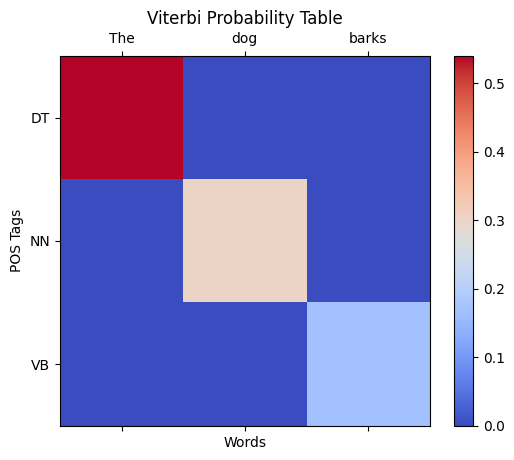

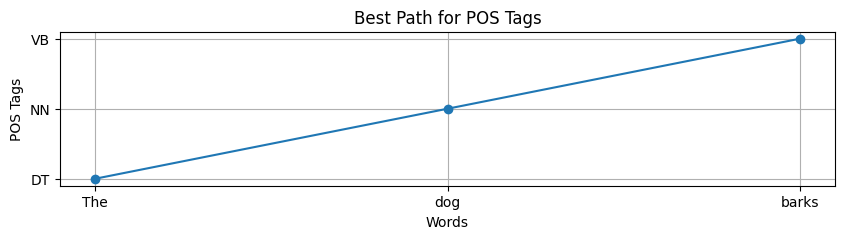

Наиболее вероятная последовательность тегов: ['DT', 'NN', 'VB']
Вероятность данной последовательности: 0.1693


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Инициализация вероятностей
states = ['DT', 'NN', 'VB']
observations = ['The', 'dog', 'barks']
start_prob = np.array([0.6, 0.3, 0.1])
transition_prob = np.array([[0.0, 0.8, 0.0],  # from DT to NN
                            [0.0, 0.0, 0.7],  # from NN to VB
                            [0.0, 0.0, 0.0]])  # VB can't go anywhere
emission_prob = np.array([[0.9, 0.0, 0.0],  # DT emits 'The'
                          [0.0, 0.7, 0.0],  # NN emits 'dog'
                          [0.0, 0.0, 0.8]])  # VB emits 'barks'

# Витерби алгоритм
def viterbi(obs, states, start_prob, trans_prob, emiss_prob):
    n_states = len(states)
    n_obs = len(obs)

    delta = np.zeros((n_obs, n_states))
    psi = np.zeros((n_obs, n_states), dtype=int)

    # Step 1: Initialization
    delta[0, :] = start_prob * emiss_prob[:, 0]

    # Step 2: Recursion
    for t in range(1, n_obs):
        for j in range(n_states):
            max_prob = -1
            max_state = -1
            for i in range(n_states):
                prob = delta[t-1, i] * trans_prob[i, j] * emiss_prob[j, t]
                if prob > max_prob:
                    max_prob = prob
                    max_state = i
            delta[t, j] = max_prob
            psi[t, j] = max_state

    # Step 3: Termination
    max_final_prob = max(delta[-1, :])
    best_path = np.zeros(n_obs, dtype=int)
    best_path[-1] = np.argmax(delta[-1, :])

    # Backtrack to find the full best path
    for t in range(n_obs-2, -1, -1):
        best_path[t] = psi[t+1, best_path[t+1]]

    return best_path, max_final_prob, delta

# Вызов функции для POS-теггинга
best_path, best_prob, delta = viterbi(observations, states, start_prob, transition_prob, emission_prob)

# Визуализация вероятностей
def plot_hmm(states, observations, delta):
    fig, ax = plt.subplots()
    cax = ax.matshow(delta.T, cmap='coolwarm')
    fig.colorbar(cax)

    ax.set_xticks(np.arange(len(observations)))
    ax.set_yticks(np.arange(len(states)))
    ax.set_xticklabels(observations)
    ax.set_yticklabels(states)

    plt.xlabel("Words")
    plt.ylabel("POS Tags")
    plt.title("Viterbi Probability Table")
    plt.show()

# Визуализация последовательности тегов
def plot_best_path(best_path, states, observations):
    plt.figure(figsize=(10, 2))
    plt.plot(best_path, marker='o')
    plt.xticks(np.arange(len(observations)), observations)
    plt.yticks(np.arange(len(states)), states)
    plt.title("Best Path for POS Tags")
    plt.xlabel("Words")
    plt.ylabel("POS Tags")
    plt.grid()
    plt.show()

# Визуализация вероятностей
plot_hmm(states, observations, delta)

# Визуализация последовательности тегов
plot_best_path(best_path, states, observations)

# Результаты
tag_sequence = [states[i] for i in best_path]
print(f"Наиболее вероятная последовательность тегов: {tag_sequence}")
print(f"Вероятность данной последовательности: {best_prob:.4f}")


### Пример 2: CRF для POS-теггинга

Для выполнения CRF потребуется специализированная библиотека, например, `sklearn-crfsuite`.


#### Реализация с визуализацией


In [20]:
!pip install sklearn_crfsuite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.8 MB/s eta 0:00:00


Прогноз для 'She eats apples': ['PRP' 'VB' 'NN']


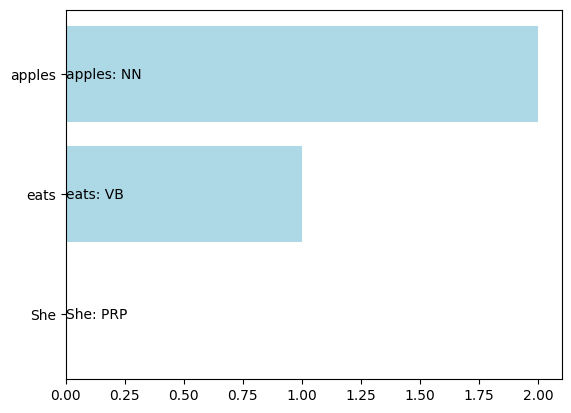

In [21]:
import sklearn_crfsuite
import matplotlib.pyplot as plt

# Обучающая выборка для CRF
train_sents = [
    [('She', 'PRP'), ('eats', 'VB'), ('apples', 'NN')],
    [('He', 'PRP'), ('runs', 'VB'), ('fast', 'RB')]
]

# Функция для извлечения признаков
def word2features(sent, i):
    word = sent[i][0]
    features = {
        'word': word,
        'prefix_2': word[:2],
        'suffix_2': word[-2:],
    }
    return features

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, label in sent]

# Подготовка данных
X_train = [sent2features(s) for s in train_sents]
y_train = [sent2labels(s) for s in train_sents]

# Обучение модели CRF
crf = sklearn_crfsuite.CRF()
crf.fit(X_train, y_train)

# Прогноз для нового предложения
test_sent = [('She',), ('eats',), ('apples',)]
X_test = [sent2features(test_sent)]
y_pred = crf.predict(X_test)

# Результаты
print(f"Прогноз для 'She eats apples': {y_pred[0]}")

# Визуализация (предсказания)
def visualize_crf_predictions(tokens, tags):
    fig, ax = plt.subplots()
    ax.barh(tokens, range(len(tokens)), color="lightblue", label="Теги")

    for i in range(len(tokens)):
        ax.text(0, i, f"{tokens[i]}: {tags[i]}", va='center', color='black')
    plt.show()

# Визуализация
tokens = [word[0] for word in test_sent]
visualize_crf_predictions(tokens, y_pred[0])




### Пример 3: Байесовский POS-теггинг

#### Реализация на Python


Предложение: ['He', 'runs', 'fast']
Теги: ['PRP', 'VB', 'RB']
Вероятность: 0.1361


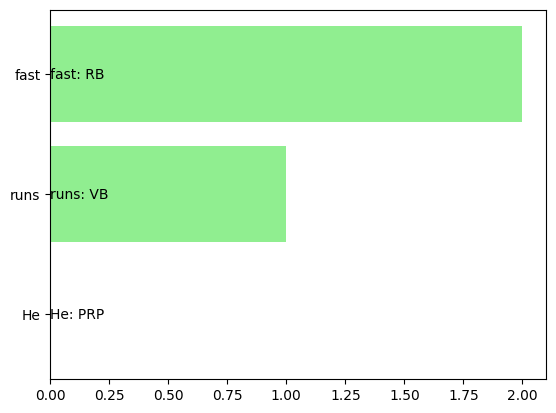

In [22]:
# Задаем вероятности
start_probs = {'PRP': 0.5, 'VB': 0.3, 'RB': 0.2}
transition_probs = {
    'PRP': {'VB': 0.6},
    'VB': {'RB': 0.7}
}
emission_probs = {
    'PRP': {'He': 0.8},
    'VB': {'runs': 0.9},
    'RB': {'fast': 0.9}
}

# Алгоритм Байеса для POS-теггинга
def bayes_pos_tagging(words):
    tags = []
    prob = 1
    for i, word in enumerate(words):
        if i == 0:
            tag = max(start_probs, key=lambda tag: start_probs[tag] * emission_probs.get(tag, {}).get(word, 0))
            prob *= start_probs[tag] * emission_probs[tag][word]
        else:
            prev_tag = tags[-1]
            tag = max(transition_probs[prev_tag], key=lambda t: transition_probs[prev_tag][t] * emission_probs.get(t, {}).get(word, 0))
            prob *= transition_probs[prev_tag][tag] * emission_probs[tag][word]
        tags.append(tag)
    return tags, prob

# Пример
words = ['He', 'runs', 'fast']
tags, prob = bayes_pos_tagging(words)

# Результаты
print(f"Предложение: {words}")
print(f"Теги: {tags}")
print(f"Вероятность: {prob:.4f}")

# Визуализация
def visualize_bayes(words, tags):
    fig, ax = plt.subplots()
    ax.barh(words, range(len(words)), color="lightgreen", label="POS Tags")

    for i in range(len(words)):
        ax.text(0, i, f"{words[i]}: {tags[i]}", va='center', color='black')
    plt.show()

visualize_bayes(words, tags)

#5. Named Entity Recognition (NER)

#### 1. Введение

**Named Entity Recognition (NER)** — одна из ключевых задач в области обработки естественного языка (NLP), направленная на автоматическое выделение и классификацию именованных сущностей в тексте, таких как люди, организации, географические объекты, даты и другие ключевые элементы. Основная цель NER — превратить необработанный текст в структурированные данные, что может быть полезно для задач информационного поиска, создания баз данных, машинного перевода и др.

#### 2. Основные понятия NER

NER подразумевает решение задачи разделения текста на определенные категории или классы, такие как:

- **Организации** (например, Google, Microsoft)
- **Персоны** (например, Исаак Ньютон, Альберт Эйнштейн)
- **Места** (например, Нью-Йорк, Москва)
- **Даты и время** (например, 25 декабря 2024 года)
- **События** (например, Вторая мировая война)

Эти классы могут расширяться в зависимости от специфики задачи.

#### 3. Основные подходы к NER

##### 3.1. Ручная разметка и правила
Один из первых подходов к NER состоял в использовании правил и регулярных выражений для выделения сущностей. Эти подходы сильно зависели от заранее составленных шаблонов, что затрудняло их масштабируемость.

##### 3.2. Статистические методы
Использование машинного обучения привело к улучшению точности NER, когда текстовые данные представляются в виде признаков, а модель обучается классифицировать каждое слово как принадлежащее или не принадлежащее определенной сущности.

##### 3.3. Нейронные сети
Современные модели NER основаны на глубоких нейронных сетях, таких как рекуррентные нейронные сети (RNN), LSTM (долгая краткосрочная память) и трансформеры. Эти модели позволяют обрабатывать контекст и зависимость между словами.

#### 4. Математические основы NER

Основной задачей в NER является предсказание метки для каждого слова в предложении. Это можно формализовать как задачу классификации последовательностей.

Пусть у нас есть предложение $S = (w_1, w_2, \dots, w_n)$, где $w_i$ — i-е слово предложения, а $y = (y_1, y_2, \dots, y_n)$ — последовательность меток для этих слов. Каждая метка $y_i$ может принимать одно из возможных значений из множества классов сущностей, таких как \{PERSON, LOCATION, ORGANIZATION, O\}, где $O$ означает отсутствие метки.

##### 4.1. Целевая функция
В задачах NER обычно используется логистическая регрессия для предсказания вероятностей каждого класса для каждого слова:

$$
P(y_i \mid w_i) = \frac{e^{\mathbf{W}_y \mathbf{h}_i}}{\sum_{k=1}^{K} e^{\mathbf{W}_k \mathbf{h}_i}}
$$

где $\mathbf{W}_y$ — матрица весов для класса $y$, $\mathbf{h}_i$ — вектор признаков слова $w_i$, $K$ — количество классов.

##### 4.2. Функция потерь
Для обучения модели NER используется функция потерь кросс-энтропии, которая минимизирует разницу между предсказанными вероятностями и истинными метками:

$$
L = - \sum_{i=1}^{n} \log P(y_i \mid w_i)
$$

##### 4.3. CRF (Conditional Random Fields)
В NER часто используют CRF, который позволяет учитывать зависимости между метками соседних слов. Целевая функция в CRF учитывает совместные вероятности последовательностей меток:

$$
P(y \mid w) = \frac{\exp\left(\sum_{i=1}^{n} \mathbf{W}_y \mathbf{h}_i + \mathbf{T}_{y_{i-1}, y_i}\right)}{\sum_{y'} \exp\left(\sum_{i=1}^{n} \mathbf{W}_{y'} \mathbf{h}_i + \mathbf{T}_{y'_{i-1}, y'_i}\right)}
$$

где $\mathbf{T}_{y_{i-1}, y_i}$ — матрица переходов между метками соседних слов.

#### 5. Модели для NER

##### 5.1. LSTM
Рекуррентные нейронные сети (RNN) и их усовершенствованная версия LSTM часто используются для захвата зависимости между словами в предложении:

$$
h_t = LSTM(x_t, h_{t-1})
$$

где $x_t$ — входное представление слова, $h_t$ — скрытое состояние на шаге $t$.

##### 5.2. BERT (Bidirectional Encoder Representations from Transformers)
Модель BERT, основанная на трансформерах, захватывает контекст как с левой, так и с правой стороны слова, что значительно улучшает качество распознавания сущностей:

$$
h_t = \text{Transformer}(x_t)
$$

BERT использует двухуровневую архитектуру, что позволяет эффективно предсказывать метки для слов, учитывая их окружение.

#### 6. Пример решения задачи NER

Рассмотрим предложение: "Исаак Ньютон родился в Англии в 1643 году."

##### 6.1. Шаг 1: Токенизация
Разбиваем предложение на слова:
$$
S = [\text{"Исаак"}, \text{"Ньютон"}, \text{"родился"}, \text{"в"}, \text{"Англии"}, \text{"в"}, \text{"1643"}, \text{"году"}]
$$

##### 6.2. Шаг 2: Представление слов
Для каждого слова создаем векторное представление, используя, например, embeddings (например, Word2Vec или BERT).

##### 6.3. Шаг 3: Предсказание меток
Применяем модель NER, которая предсказывает метки для каждого слова:

- "Исаак" — PERSON
- "Ньютон" — PERSON
- "Англии" — LOCATION
- "1643" — DATE

##### 6.4. Шаг 4: Объединение сущностей
После предсказания меток объединяем слова, принадлежащие одной сущности, например, "Исаак Ньютон" — это одна сущность класса PERSON.

##### 6.5. Шаг 5: Оценка результатов
Используем метрики, такие как точность (precision), полнота (recall) и F1-мера для оценки качества модели:

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$
$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$
$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

#### 7. Числовой пример

Допустим, модель NER на тестовом наборе данных распознала следующие сущности:

- "Исаак Ньютон" как PERSON (верно)
- "Англия" как LOCATION (верно)
- "1643 год" как DATE (неверно, ошибка в определении диапазона)

Для оценки модели считаем количество верных и ошибочных предсказаний:

- Верные положительные (TP) = 2 (PERSON и LOCATION)
- Ложные положительные (FP) = 0
- Ложные отрицательные (FN) = 1 (ошибка в дате)

Тогда:

$$
\text{Precision} = \frac{2}{2 + 0} = 1.0
$$
$$
\text{Recall} = \frac{2}{2 + 1} = 0.67
$$
$$
F1 = 2 \cdot \frac{1.0 \cdot 0.67}{1.0 + 0.67} = 0.80
$$

#### 8. Заключение

Named Entity Recognition (NER) является важным этапом обработки естественного языка, позволяющим извлекать значимые сущности из текста и представлять их в структурированном виде. Математические основы NER основаны на моделях классификации последовательностей, где используются функции потерь, такие как кросс-энтропия, а также методы CRF для учета зависимостей между словами. Современные модели, такие как BERT, значительно улучшили точность задач NER благодаря использованию трансформеров и глубокого обучения.



##Примеры



### Числовой Пример 1: Предсказание Сущностей в Тексте

#### Задача:

Дано предложение:  
**"Apple была основана Стивом Джобсом в 1976 году в Калифорнии."**

Требуется распознать сущности (PERSON, ORGANIZATION, LOCATION, DATE) с использованием модели NER.

#### Решение:

1. **Токенизация предложения:**  
   Мы разделяем предложение на отдельные слова:
   $$
   S = [\text{"Apple"}, \text{"была"}, \text{"основана"}, \text{"Стивом"}, \text{"Джобсом"}, \text{"в"}, \text{"1976"}, \text{"году"}, \text{"в"}, \text{"Калифорнии"}]
   $$

2. **Векторное представление слов:**  
   Используем embeddings (например, Word2Vec или BERT) для преобразования слов в векторы. Предположим, что для простоты у нас есть некие векторные представления для каждого слова.

3. **Предсказание меток:**  
   Модель NER предсказывает для каждого слова метку:
   - "Apple" — ORGANIZATION
   - "Стивом" — PERSON
   - "Джобсом" — PERSON
   - "1976" — DATE
   - "Калифорнии" — LOCATION

   Остальные слова получают метку "O" (other), так как они не относятся к сущностям.

4. **Результат предсказания:**  
   Сформируем результат:
   $$
   \text{Entities} = [(\text{"Apple"}, \text{ORGANIZATION}), (\text{"Стивом Джобсом"}, \text{PERSON}), (\text{"1976"}, \text{DATE}), (\text{"Калифорнии"}, \text{LOCATION})]
   $$

5. **Оценка результатов:**  
   Модель правильно определила все сущности. Допустим, у нас есть истинные метки:

   - "Apple" — ORGANIZATION
   - "Стивом Джобсом" — PERSON
   - "1976" — DATE
   - "Калифорнии" — LOCATION

   Все предсказания совпадают с истинными метками, поэтому можно рассчитать точность, полноту и F1-меру.

   Формулы:

   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$
   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$
   $$
   F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

   Поскольку все предсказания верные (TP = 4, FP = 0, FN = 0), точность и полнота равны 1.0:
   $$
   \text{Precision} = \frac{4}{4 + 0} = 1.0
   $$
   $$
   \text{Recall} = \frac{4}{4 + 0} = 1.0
   $$
   $$
   F1 = 2 \cdot \frac{1.0 \cdot 1.0}{1.0 + 1.0} = 1.0
   $$

### Числовой Пример 2: Ошибка в Распознавании Даты

#### Задача:

Дано предложение:  
**"Майкл Джордан выиграл свой первый чемпионат NBA в 1991 году."**

Требуется распознать сущности (PERSON, ORGANIZATION, DATE) с использованием модели NER.

#### Решение:

1. **Токенизация предложения:**  
   Токенизация предложения:
   $$
   S = [\text{"Майкл"}, \text{"Джордан"}, \text{"выиграл"}, \text{"свой"}, \text{"первый"}, \text{"чемпионат"}, \text{"NBA"}, \text{"в"}, \text{"1991"}, \text{"году"}]
   $$

2. **Векторное представление слов:**  
   Преобразуем каждое слово в векторное представление с помощью embeddings.

3. **Предсказание меток:**  
   Модель NER предсказывает метки:
   - "Майкл" — PERSON
   - "Джордан" — PERSON
   - "NBA" — ORGANIZATION
   - "1991" — DATE (но модель ошиблась и предсказала это как ORGANIZATION)
   - "году" — O

4. **Результат предсказания:**  
   Итоговое предсказание:
   $$
   \text{Entities} = [(\text{"Майкл Джордан"}, \text{PERSON}), (\text{"NBA"}, \text{ORGANIZATION}), (\text{"1991"}, \text{ORGANIZATION})]
   $$

   Модель ошиблась при распознавании даты "1991", классифицировав её как ORGANIZATION.

5. **Оценка результатов:**  
   Истинные метки:
   - "Майкл Джордан" — PERSON
   - "NBA" — ORGANIZATION
   - "1991" — DATE

   Рассчитаем точность, полноту и F1-меру.

   Верные положительные (TP) = 2 (PERSON и ORGANIZATION).  
   Ложные положительные (FP) = 1 (ошибочно распознана дата как ORGANIZATION).  
   Ложные отрицательные (FN) = 1 (не распознана дата "1991").

   $$
   \text{Precision} = \frac{TP}{TP + FP} = \frac{2}{2 + 1} = 0.67
   $$
   $$
   \text{Recall} = \frac{TP}{TP + FN} = \frac{2}{2 + 1} = 0.67
   $$
   $$
   F1 = 2 \cdot \frac{0.67 \cdot 0.67}{0.67 + 0.67} = 0.67
   $$

### Числовой Пример 3: Ошибка в Распознавании Локации

#### Задача:

Дано предложение:  
**"Tesla Inc. была основана в 2003 году в Пало-Альто."**

Требуется распознать сущности (ORGANIZATION, DATE, LOCATION) с использованием модели NER.

#### Решение:

1. **Токенизация предложения:**  
   Разбиваем предложение на слова:
   $$
   S = [\text{"Tesla"}, \text{"Inc."}, \text{"была"}, \text{"основана"}, \text{"в"}, \text{"2003"}, \text{"году"}, \text{"в"}, \text{"Пало-Альто"}]
   $$

2. **Векторное представление слов:**  
   Используем embeddings для представления слов.

3. **Предсказание меток:**  
   Модель NER предсказывает метки:
   - "Tesla Inc." — ORGANIZATION
   - "2003" — DATE
   - "Пало-Альто" — O (ошибка модели, так как это LOCATION)

4. **Результат предсказания:**  
   Итоговое предсказание:
   $$
   \text{Entities} = [(\text{"Tesla Inc."}, \text{ORGANIZATION}), (\text{"2003"}, \text{DATE})]
   $$

   Модель не распознала "Пало-Альто" как LOCATION, что является ошибкой.

5. **Оценка результатов:**  
   Истинные метки:
   - "Tesla Inc." — ORGANIZATION
   - "2003" — DATE
   - "Пало-Альто" — LOCATION

   Рассчитаем метрики:

   Верные положительные (TP) = 2 (ORGANIZATION и DATE).  
   Ложные отрицательные (FN) = 1 (не распознана локация "Пало-Альто").

   $$
   \text{Precision} = \frac{TP}{TP + FP} = \frac{2}{2 + 0} = 1.0
   $$
   $$
   \text{Recall} = \frac{TP}{TP + FN} = \frac{2}{2 + 1} = 0.67
   $$
   $$
   F1 = 2 \cdot \frac{1.0 \cdot 0.67}{1.0 + 0.67} = 0.80
   $$



Эти три числовых примера показывают, как модель NER справляется с различными типами сущностей и как ошибки могут влиять на показатели точности, полноты и F1-меры.


Давайте реализуем примеры на Python с использованием библиотеки `spaCy` для распознавания именованных сущностей. Мы также визуализируем результаты с помощью библиотеки `matplotlib`. Убедитесь, что у вас установлены необходимые библиотеки. Если нет, их можно установить с помощью:


### Пример 1: Распознавание Сущностей


In [25]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 39.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Результаты для Примера 1:
('Apple', 'ORG')
('Стивом Джобсом', 'PER')
('Калифорнии', 'LOC')


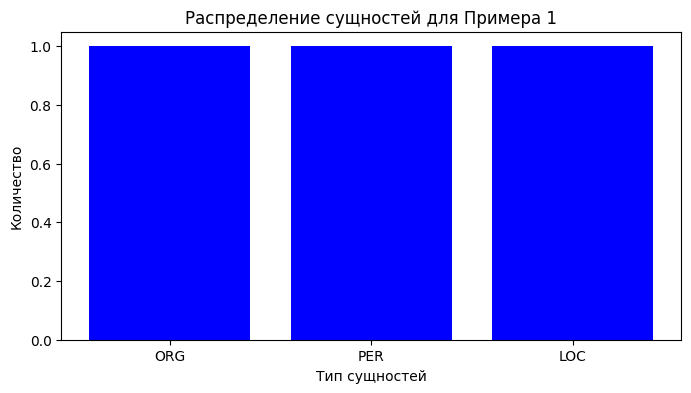

In [26]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Загрузка модели для русского языка
nlp = spacy.load("ru_core_news_sm")

# Пример 1: Распознавание сущностей
text1 = "Apple была основана Стивом Джобсом в 1976 году в Калифорнии."
doc1 = nlp(text1)

# Извлечение сущностей
entities1 = [(ent.text, ent.label_) for ent in doc1.ents]

print("Результаты для Примера 1:")
for ent in entities1:
    print(ent)

# Визуализация
labels1, counts1 = zip(*Counter([ent[1] for ent in entities1]).items())

plt.figure(figsize=(8, 4))
plt.bar(labels1, counts1, color='blue')
plt.title("Распределение сущностей для Примера 1")
plt.xlabel("Тип сущностей")
plt.ylabel("Количество")
plt.show()



### Пример 2: Ошибка в Распознавании Даты



Результаты для Примера 2:
('Майкл Джордан', 'PER')


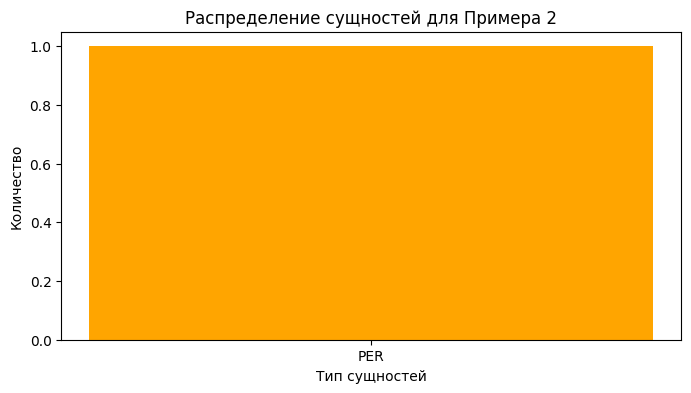

In [27]:
# Пример 2: Распознавание сущностей
text2 = "Майкл Джордан выиграл свой первый чемпионат NBA в 1991 году."
doc2 = nlp(text2)

# Извлечение сущностей
entities2 = [(ent.text, ent.label_) for ent in doc2.ents]

print("\nРезультаты для Примера 2:")
for ent in entities2:
    print(ent)

# Визуализация
labels2, counts2 = zip(*Counter([ent[1] for ent in entities2]).items())

plt.figure(figsize=(8, 4))
plt.bar(labels2, counts2, color='orange')
plt.title("Распределение сущностей для Примера 2")
plt.xlabel("Тип сущностей")
plt.ylabel("Количество")
plt.show()


### Пример 3: Ошибка в Распознавании Локации



Результаты для Примера 3:
('Tesla Inc', 'ORG')
('Пало-Альто', 'LOC')


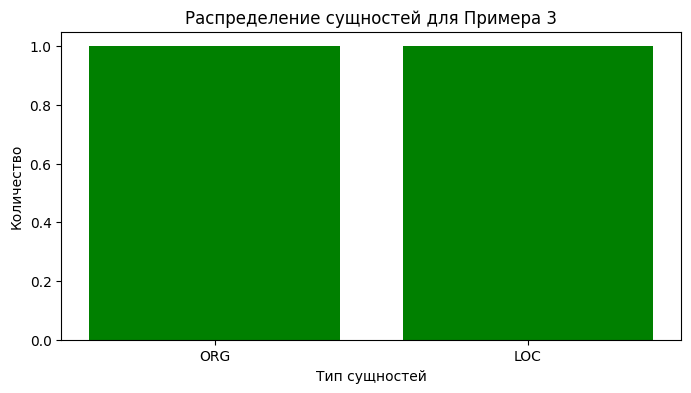

In [28]:
# Пример 3: Распознавание сущностей
text3 = "Tesla Inc. была основана в 2003 году в Пало-Альто."
doc3 = nlp(text3)

# Извлечение сущностей
entities3 = [(ent.text, ent.label_) for ent in doc3.ents]

print("\nРезультаты для Примера 3:")
for ent in entities3:
    print(ent)

# Визуализация
labels3, counts3 = zip(*Counter([ent[1] for ent in entities3]).items())

plt.figure(figsize=(8, 4))
plt.bar(labels3, counts3, color='green')
plt.title("Распределение сущностей для Примера 3")
plt.xlabel("Тип сущностей")
plt.ylabel("Количество")
plt.show()






##Вопросы для самопроверки
###1. Марковские цепи
1. Что такое Марковская цепь и каковы ее основные свойства?
2. Как формируется матрица переходов в Марковской цепи?
3. В чем заключается свойство «без памяти» в контексте Марковских цепей?
4. Каковы отличия между однородными и не однородными Марковскими цепями?
5. Объясните, что такое состояние в Марковской цепи.
6. Как можно использовать Марковские цепи для генерации текста?
7. Что такое стационарное распределение и как оно связано с Марковскими цепями?
8. Как можно оценить вероятность перехода между состояниями в Марковской цепи?
9. Как выстраивается граф переходов для Марковских цепей?
10. В чем заключается отличие между состояниями и наблюдаемыми событиями в контексте скрытых Марковских моделей (HMM)?
11. Приведите пример использования Марковских цепей в NLP.
12. Какова роль начального состояния в расчетах вероятностей Марковской цепи?
13. Как вы можете визуализировать процесс переходов в Марковской цепи?
14. Как можно оценить среднее время достижения состояния в Марковской цепи?
15. Каковы ограничения использования Марковских цепей для анализа текстов?


### 2. NMF

1. Что такое Non-negative Matrix Factorization (NMF)?
2. Какие преимущества предоставляет NMF по сравнению с другими методами разложения матриц?
3. В каких задачах NLP может быть полезен NMF?
4. Объясните, как работает алгоритм NMF.
5. Какие условия должны быть выполнены для применения NMF?
6. Какова роль матриц $W$ и $H$ в NMF?
7. Каковы основные гиперпараметры, которые необходимо настраивать при использовании NMF?
8. Что такое факторизация матрицы?
9. Объясните, как NMF может использоваться для тематического моделирования.
10. Как NMF справляется с отсутствующими значениями в данных?
11. В чем разница между NMF и Singular Value Decomposition (SVD)?
12. Как можно визуализировать результаты NMF?
13. Как можно интерпретировать полученные матрицы $W$ и $H$?
14. Как NMF может использоваться для уменьшения размерности данных?
15. Какие существуют методы инициализации для NMF, и как они влияют на результаты?


###3. Dependency Parsing и Constituency Parsing

1.  Что такое Dependency Parsing и какова его основная цель?
2.  Опишите основные элементы графа зависимостей.
3.  Как можно представить зависимость между словами в предложении?
4.  Что такое Constituency Parsing и в чем его отличие от Dependency Parsing?
5.  Какова роль контекстно-свободных грамматик (CFG) в Constituency Parsing?
6.  Приведите пример зависимости и объясните, что такое "корень" в зависимости.
7.  Каковы основные компоненты предложения в модели Constituency Parsing?
8.  Что такое "арка" в контексте Dependency Parsing?
9.  Какой алгоритм обычно используется для анализа зависимостей?
10.  Что такое деревья разбора (parse trees) и как они визуализируются?
11.  Какова разница между фразой (phrase) и словом (word) в контексте Constituency Parsing?
12.  Как можно использовать вероятностные модели в зависимости и фразовой структуре?
13.  Приведите пример, как может выглядеть грамматика CFG для простого предложения.
14.  Что такое "линейный порядок" слов и как он влияет на парсинг?
15.  Каковы преимущества и недостатки методов Dependency и Constituency Parsing?


### 4. POS

1. Что такое Part-of-Speech (POS) Tagging и для чего он используется в NLP?
2. Какие основные методы используются для POS-теггинга?
3. Каковы основные компоненты скрытой марковской модели (HMM) для POS-теггинга?
4. Опишите алгоритм Витерби. В чем его ключевая идея?
5. Какова разница между эмиссионной и переходной вероятностью в HMM?
6. Что такое условные случайные поля (CRF) и в чем их преимущество перед HMM?
7. Каковы основные характеристики словесных признаков, используемых в CRF?
8. Как осуществляется обучение модели CRF?
9. Какие проблемы могут возникнуть при использовании простых наивных байесовских методов для POS-теггинга?
10. Что такое токенизация и как она связана с POS-теггингом?
11. Каковы основные преимущества и недостатки использования статистических методов для POS-теггинга по сравнению с правилами?
12. В чем заключаются преимущества использования глубокого обучения для задач POS-теггинга?
13. Как использовать контекст для улучшения точности POS-теггинга?
14. Каковы основные метрики для оценки качества моделей POS-теггинга?
15. В чем заключается роль предварительной обработки текста перед POS-теггингом?


###5. Named Entity Recognition (NER)

1. Что такое **Named Entity Recognition (NER)** и в каких задачах NLP оно применяется?
2. Какие сущности чаще всего распознаются в системах NER?
3. Объясните разницу между **BIO** и **BILOU** схемами аннотирования.
4. Какова основная структура системы NER? Какие этапы она включает?
5. В чем заключается процесс токенизации текста перед его обработкой системой NER?
6. Какие методы машинного обучения используются для построения моделей NER?
7. Как вектора слов (embeddings) влияют на качество распознавания именованных сущностей?
8. Какие существуют подходы к построению векторных представлений слов для задач NER (например, Word2Vec, GloVe, BERT)?
9. Объясните, как работают **CRF** (Conditional Random Fields) в задачах NER.
10. В чем разница между классическими методами NER и современными трансформерными моделями (например, BERT, GPT)?
11. Какие метрики используются для оценки качества работы модели NER? Объясните, как они рассчитываются.
12. Как влияет качество разметки обучающего набора данных на точность NER?
13. Какие ошибки чаще всего встречаются в NER? Приведите примеры ложных срабатываний и пропусков сущностей.
14. В чем различие между ручной разметкой данных для NER и автоматизированной разметкой?
15. Как можно улучшить производительность модели NER при распознавании сущностей в многоязычных текстах?


## Задачи для самостоятельной работы
###1. Марковские цепи
1. Постройте матрицу переходов для Марковской цепи с 4 состояниями и случайными вероятностями.
2. Реализуйте программу, которая рассчитывает вероятности состояний после 5 шагов, начиная с заданного начального состояния.
3. Сгенерируйте текст с использованием Марковской цепи на основе заданного набора биграмм.
4. Найдите стационарное распределение для матрицы переходов, используя метод итераций.
5. Проведите симуляцию случайного блуждания на графе с 6 состояниями.
6. Напишите программу для визуализации переходов в Марковской цепи с 3 состояниями.
7. Оцените вероятность перехода между состояниями для заданного текста.
8. Реализуйте скрытую Марковскую модель для классификации текстов на основе меток.
9. Сравните результаты классификации текстов с использованием обычных и скрытых Марковских моделей.
10. Постройте модель последовательностей на основе набора данных из 10 предложений.
11. Определите, как можно улучшить модель Марковских цепей, добавив контекст (например, трограммы).
12. Сравните результаты генерации текста с использованием Марковских цепей и рекуррентных нейронных сетей.
13. Реализуйте программу, которая вычисляет среднее время достижения состояния в заданной Марковской цепи.
14. Проанализируйте влияние начального состояния на результаты переходов в цепи.
15. Напишите текстовый анализатор, который использует Марковские цепи для определения эмоциональной окраски текста.
16. Создайте граф переходов для цепи, состоящей из трех состояний, и нарисуйте его с помощью `networkx`.
17. Реализуйте функцию, которая принимает текст и возвращает матрицу переходов для биграмм.
18. Измените структуру переходов в своей модели и посмотрите, как это повлияет на результаты генерации текста.
19. Проведите эксперимент, сравнив длину сгенерированного текста на основе различных начальных состояний.
20. Создайте набор данных, используя текстовые фрагменты, и постройте на их основе модель Марковской цепи.
21. Используйте результаты своего анализа для создания чат-бота, который будет генерировать текст на основе заданных тем.
22. Напишите программу, которая визуализирует вероятности переходов в скрытой Марковской модели.
23. Определите, сколько состояний нужно для реализации конкретного текстового генератора.
24. Исследуйте, как изменяются вероятности переходов, если добавить или удалить слова из модели.
25. Сравните использование различных моделей для генерации текстов на одном и том же наборе данных.
26. Постройте свою собственную скрытую Марковскую модель для распознавания речи.
27. Создайте систему, которая классифицирует текст на основе переходов в скрытых состояниях.
28. Реализуйте модель на основе множества биграмм и оцените ее производительность.
29. Примените изученные концепции для создания модели для анализа тональности текстов.
30. Оцените, как размер набора данных влияет на качество результатов, получаемых с помощью Марковских цепей.



### 2. NMF

1. Реализуйте NMF для матрицы, представляющей частоты слов в текстах, и интерпретируйте полученные темы.
2. Используйте NMF для кластеризации документов и сравните результаты с K-means.
3. Проведите анализ чувствительности: измените количество тем в NMF и посмотрите, как это влияет на результаты.
4. Примените NMF к набору данных с отзывами пользователей о продуктах, чтобы выделить скрытые темы.
5. Сравните NMF с Latent Dirichlet Allocation (LDA) на одном и том же наборе данных.
6. Создайте визуализацию распределения тем по документам с помощью NMF.
7. Примените NMF к изображению, чтобы уменьшить его размерность, и восстановите изображение из матриц $W$ и $H$.
8. Разработайте приложение, использующее NMF для анализа текста в реальном времени.
9. Исследуйте, как предобработка данных (например, лемматизация, удаление стоп-слов) влияет на результаты NMF.
10. Сравните результаты NMF с другими методами уменьшения размерности, такими как PCA.
11. Проведите эксперименты с разными функциями потерь при оптимизации NMF.
12. Используйте NMF для выявления паттернов в временных рядах.
13. Проанализируйте матрицы $W$ и $H$ для выявления неожиданных тем или факторов.
14. Постройте график зависимости потерь от количества итераций при обучении NMF.
15. Проведите исследование, используя NMF для анализа эмоционального окраса текстов.
16. Реализуйте NMF на других языках программирования (например, R или Julia) и сравните производительность.
17. Изучите, как можно улучшить интерпретируемость тем, полученных с помощью NMF.
18. Примените NMF к набору данных с различными типами текстов (новости, блоги, рецензии).
19. Проанализируйте, как разные стратегии инициализации влияют на сходимость NMF.
20. Используйте NMF для построения рекомендательной системы на основе контента.
21. Попробуйте использовать NMF для обработки изображений и выявления скрытых структур.
22. Реализуйте NMF с использованием различных библиотек (например, TensorFlow, PyTorch).
23. Исследуйте возможности NMF для обработки многомодальных данных.
24. Разработайте стратегию, чтобы использовать результаты NMF для улучшения качества поисковых систем.
25. Проведите анализ времени выполнения NMF на различных наборах данных.
26. Исследуйте, как можно использовать NMF для создания аннотаций текстов.
27. Используйте NMF для выявления особенностей в текстах, связанных с определенной темой или событием.
28. Разработайте набор метрик для оценки качества разложения, полученного с помощью NMF.
29. Примените NMF к данным о продажах и анализируйте скрытые факторы, влияющие на продажи.
30. Проанализируйте, как NMF может быть интегрирован в существующие системы машинного обучения для улучшения результатов.




###3. Dependency Parsing и Constituency Parsing

1.  Построить дерево зависимостей для предложения:  "The quick brown fox jumps."
2.  Создать CFG для следующего предложения:  "The dog barked at the mailman."
3.  Определить зависимость для слова "barked" в предложении:  "The dog barked loudly."
4.  Построить граф зависимостей для предложения:  "She sells sea shells by the sea shore."
5.  Визуализировать дерево разбора для предложения:  "He ran quickly."
6.  Разработать CFG для описания структуры предложений с предлогами.
7.  Написать функцию на Python, которая принимает предложение и возвращает его зависимое дерево.
8.  Сравнить результаты Dependency и Constituency Parsing для одного и того же предложения.
9.  Создать граф зависимостей для сложного предложения:  "While I was walking, I saw a dog."
10.  Построить дерево разбора для следующего предложения:  "The tall man gave the short woman a flower."
11.  Создать пример предложения с несколькими зависимостями и визуализировать его.
12.  Разработать вероятностную модель для парсинга предложений на основе заданной CFG.
13.  Изучить существующие библиотеки для парсинга в Python и написать небольшой код для их использования.
14.  Исследовать, как изменение порядка слов в предложении влияет на дерево зависимостей.
15.  Написать краткий отчет о разнице между Dependency и Constituency Parsing.
16.  Построить дерево разбора для предложения:  "The cat chased the mouse quickly."
17.  Сравнить производительность различных алгоритмов парсинга на наборе данных.
18.  Разработать CFG для сложного предложения с относительными придаточными.
19.  Собрать и проанализировать выборку предложений для выявления частоты различных зависимостей.
20.  Написать программу для автоматического определения зависимости в предложении.
21.  Построить дерево зависимостей для предложения:  "Many students in the class passed the exam."
22.  Изучить влияние контекста на интерпретацию зависимостей в предложении.
23.  Сравнить визуализации Dependency и Constituency Parsing для одного и того же предложения.
24.  Разработать CFG для описания сложных предложений с несколькими придаточными.
25.  Построить граф зависимостей для предложения:  "The sun sets in the west."
26.  Создать дерево разбора для следующего предложения:  "After the meeting, we will discuss the project."
27.  Определить, какие грамматические ошибки могут повлиять на парсинг.
28.  Написать функцию для сравнения двух деревьев разбора и определения их различий.
29.  Изучить, как парсинг может быть применен в задачах машинного перевода.
30.  Разработать и протестировать свою собственную грамматику для простых предложений.



### 4. POS

1. Реализуйте алгоритм Витерби для простого набора данных, состоящего из 5-10 предложений с соответствующими тегами.
2. Создайте набор данных для обучения модели CRF с использованием собственных текстов и тегируйте каждое слово.
3. Сравните точность моделей HMM и CRF на одном и том же наборе данных.
4. Реализуйте POS-теггинг с использованием наивного байесовского классификатора.
5. Подготовьте текстовый корпус и выполните POS-теггинг с использованием библиотеки `nltk`.
6. Исследуйте влияние различных функций признаков на точность CRF-модели.
7. Напишите код для визуализации матрицы вероятностей переходов в HMM.
8. Используя данные о переходных вероятностях, создайте график, показывающий, как они изменяются в зависимости от длины предложения.
9. Разработайте систему POS-теггинга на основе нейронных сетей (например, LSTM или GRU).
10. Проведите оценку качества модели POS-теггинга, используя метрики точности, полноты и F1-меры.
11. Изучите, как шум в данных (ошибки или опечатки) влияет на точность POS-теггинга.
12. Используя библиотеку `spaCy`, выполните POS-теггинг на большом наборе текстов и проанализируйте результаты.
13. Исследуйте возможности использования методов Transfer Learning (например, BERT) для задач POS-теггинга.
14. Создайте веб-приложение для выполнения POS-теггинга, используя Flask или Django.
15. Напишите отчет о сравнении различных подходов к POS-теггингу и их производительности на стандартных датасетах.
16. Реализуйте HMM с использованием заданных вероятностей переходов и эмиссий для анализа предложений.
17. Постройте график точности различных моделей POS-теггинга в зависимости от объема обучающих данных.
18. Проведите исследование, сравнивающее POS-теггинг на английском и другом языке.
19. Оптимизируйте модель CRF для улучшения ее производительности на тестовом наборе.
20. Создайте набор тестовых данных, состоящий из многозначных слов, и изучите, как ваша модель обрабатывает их.
21. Проведите анализ ошибок вашей модели и предложите улучшения.
22. Используйте различные техники предобработки данных (удаление стоп-слов, стемминг, лемматизация) и оцените их влияние на производительность модели.
23. Реализуйте функцию для генерации графиков вероятностей для HMM.
24. Изучите влияние контекста на определение тегов для многозначных слов.
25. Сравните подходы к POS-теггингу в зависимости от области применения (например, юридический текст, научный текст).
26. Разработайте кастомизированные правила для POS-теггинга в специфической области (например, медицина).
27. Реализуйте подход к POS-теггингу на основе Transformer-архитектур (например, BERT).
28. Напишите тестовые случаи для проверки точности вашей модели на различных языках.
29. Изучите применение POS-теггинга в задачах Named Entity Recognition (NER).
30. Создайте интерактивный интерфейс для визуализации процесса POS-теггинга в реальном времени.


###5. Named Entity Recognition (NER)

1. Постройте модель NER для русского языка, используя библиотеку `spaCy`. Примените её к тексту новостей и найдите сущности.
2. Проведите эксперимент с разными embedding-моделями (например, Word2Vec, GloVe, BERT) и оцените, как они влияют на производительность NER.
3. Разработайте собственную модель на основе **CRF** для задачи NER и обучите её на наборе данных, состоящем из новостных статей.
4. Реализуйте классификатор сущностей с использованием **Recurrent Neural Networks (RNN)** или **LSTM**. Обучите модель на разметке NER и оцените её точность.
5. Попробуйте обучить модель NER для нескольких языков одновременно. Проанализируйте, как многоязычные данные влияют на точность распознавания.
6. Проведите анализ ошибок модели NER на реальном тексте и определите, какие типы сущностей модель предсказывает неправильно.
7. Создайте собственный набор данных для NER, содержащий текст с разметкой сущностей, и обучите на нём модель.
8. Сравните производительность моделей NER, обученных на разных наборах данных (например, новости, социальные сети, научные статьи).
9. Модифицируйте существующую модель NER так, чтобы она учитывала контекст предложения при распознавании сущностей.
10. Проверьте модель NER на тексте с различными опечатками и сокращениями. Как это повлияет на точность модели?
11. Проведите эксперимент с моделями NER, добавив новые типы сущностей (например, **EVENT**, **PRODUCT**).
12. Реализуйте автоматическое исправление ошибок модели NER с использованием методов активного обучения.
13. Проанализируйте влияние длинных зависимостей в предложениях на точность распознавания сущностей с помощью NER.
14. Разработайте систему, которая сможет извлекать сущности не только из текстов, но и из документов в формате PDF, DOCX.
15. Реализуйте систему NER, которая может автоматически идентифицировать и классифицировать редкие или новые сущности (например, новейшие компании или персоны).
16. Постройте модель NER на основе **BERT** и проведите её дообучение на специализированных данных (например, медицинские тексты).
17. Примените к модели NER **Fine-tuning** на тексты из определенной области (например, юридические документы).
18. Разработайте систему для регулярного обновления модели NER с учётом новых данных (например, новости за последние месяцы).
19. Проведите сравнительный анализ производительности моделей NER с использованием различных стратегий разметки (BIO vs BILOU).
20. Изучите влияние различных предобработок текста (например, стемминг, лемматизация) на результаты работы модели NER.
21. Создайте модель NER, которая может распознавать и классифицировать не только текстовые сущности, но и временные интервалы (например, "последний понедельник").
22. Проведите исследование использования моделей NER для улучшения других задач NLP, таких как машинный перевод или суммаризация текста.
23. Постройте систему NER для анализа юридических документов, включая такие сущности, как имена сторон, даты подписания документов и юридические термины.
24. Разработайте систему для автоматической оценки качества работы моделей NER на новых наборах данных.
25. Обучите NER-модель, которая может работать с текстами на языке с низкими ресурсами (например, на казахском или иврите).
26. Исследуйте возможности адаптации модели NER к специфическим доменам, таким как финансы, медицина или право.
27. Реализуйте систему для визуализации результатов работы NER с возможностью корректировки предсказанных сущностей пользователем.
28. Создайте модуль для автоматического сбора и разметки новых данных для NER с использованием активного обучения и обратной связи от пользователей.
29. Исследуйте влияние шумных данных (например, сгенерированных текстов) на обучение и производительность моделей NER.
30. Обучите и примените модель NER для задач анализа тональности текста, чтобы оценить, как сущности могут влиять на определение тональности текста.
